In [1]:
# librerias que utilizaras
import numpy as np
# por si no te lee las tools o functions creadas
import sys
sys.path.append("/home/serch/pdbmani/Serch/math_tricks/")
sys.path.append("/home/serch/pdbmani/Serch/")
import math_vect_tools as mymath
# herramientas para leer pdbs
import read_pdb_tools as rpt
# funciones de click generadas en pandas
import funciones_CLICK as fc
# cuenta tiempo de ejecucion
# networks
import networkx as nx

import os
os.chdir('/home/serch/pdbmani/Serch')

from collections import Counter # obtener conteo de enlaces
import ast # para pasar de str a tupla o lista

# Funcion de generacion de red de contacto.. omitiendo residuos que no nos interesan.

In [2]:
def gen_networks_tray(path,file, use_center_mass=False, min_distance_edge = 10, keep_edge_proba=0.7):
    
    path=path
    file=file
    pathfile = path+file
    
    # se define la estructura
    trj1 = rpt.Trajectory(pathfile)

    # se lee el pdb y se agrega al objeto
    trj1.ReadTraj("%s" % pathfile)
    # concatenado de frames
    trj11 = trj1.frames
    
    print('numero de frames:', len(trj11))
    
    if use_center_mass:
        for pdbstruct in trj11:
            pdbstruct.set_center_mass()
            
    def get_df_distancias(ref):
        """Funcion para obtener los enlaces de distancias de cada residuo
        Dudas en codigo pueden revisar fc.distancia_entre_atomos en ese se basa
        esta funcion, la diferencia es que se crea con el objeto residuo"""
        # se generan listas con coordenadas y numero de atomo
        #     enlaces = [ [res1.resi, res2.resi] for res1 in ref[1:-1] for res2 in ref[1:-1] 
        #                if res2.resi >= res1.resi if mymath.distance(res2.GetAtom('CA').coord, res1.GetAtom('CA').coord) < 10
        #               ]

        enlaces = []
        for res1 in ref:
            for res2 in ref:
                if res1.resi in [1,178, 201,378,401,578,601,778] or res2.resi in [1, 178, 201,378,401,578,601,778]: # se hizo a  mano el quitar los atomos que no nos interesn
                    continue
                else:
                    if res2.resi >= res1.resi and res2.resi != res1.resi:
                        dist = mymath.distance(res2.GetAtom('CA').coord, res1.GetAtom('CA').coord)
                        if  dist < min_distance_edge:
                            enlaces.append([res1.resi, res2.resi])

        # se genera la matriz de adyacencias para la red
        return enlaces

    pdbs = [pdb.GetResChain() for pdb in trj11]

    enlaces = [get_df_distancias(residues) for residues in pdbs]
    

    a = Counter([str(j) for i in enlaces for j in i]).most_common()

   
    red_promedio = nx.Graph([ast.literal_eval(i[0]) for i in a if (i[1] / len(enlaces)) > keep_edge_proba], name=file.split('.')[0])

    print(nx.info(red_promedio))

    print(trj11[0].PrintPdbInfo())
    
    return red_promedio

In [3]:
%%time
# red_dimer_con_cofact = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','dimer_con_cofact_clean2.pdb')
# red_tetra_con_cofact = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','tetra_con_cofact_clean2_click.pdb')
# red_dimer_sin_cofact = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','dimer_sin_cofact_clean2.pdb')
# red_tetra_sin_cofact = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','tetra_sin_cofact_clean.pdb')

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 15.7 µs


## Se agregan redes de tetramero completa para analizar

In [4]:
%%time
# red_tetra_con_cofact_full = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','tetra_con_cofact_all_net.pdb')
# red_tetra_sin_cofact_full = gen_networks_tray('/home/serch/pdbmani/Serch/pdbs_align_reference/','tetra_sin_cofact_all_net.pdb')

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 14.8 µs


## Escribir red

In [5]:
# nx.write_gexf(red_dimer_con_cofact, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_dimer_con_cofact.gexf')
# nx.write_gexf(red_tetra_con_cofact, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_con_cofact.gexf')
# nx.write_gexf(red_dimer_sin_cofact, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_dimer_sin_cofact.gexf')
# nx.write_gexf(red_tetra_sin_cofact, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_sin_cofact.gexf')

In [6]:
# nx.write_gexf(red_tetra_con_cofact_full, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_con_cofact_full.gexf')
# nx.write_gexf(red_tetra_sin_cofact_full, '/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_sin_cofact_full.gexf')

# Hasta aqui se generaron las redes de contacto de los experimentos

------------

# Aca se analizan las comunidades o en gephi

In [8]:
red_dimer_con_cofact = nx.read_gexf('/home/serch/pdbmani/Serch/networks_scripts/gexf/red_dimer_con_cofact.gexf')
red_tetra_con_cofact = nx.read_gexf('/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_con_cofact.gexf')
red_dimer_sin_cofact = nx.read_gexf('/home/serch/pdbmani/Serch/networks_scripts/gexf/red_dimer_sin_cofact.gexf')
red_tetra_sin_cofact = nx.read_gexf('/home/serch/pdbmani/Serch/networks_scripts/gexf/red_tetra_sin_cofact.gexf')

## Dimer con cofact Red

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import seaborn as sns

### Metricas globales

In [10]:
print(nx.info(red_dimer_con_cofact))

Name: dimer_con_cofact_clean2
Type: Graph
Number of nodes: 352
Number of edges: 2843
Average degree:  16.1534


In [11]:
# densidad, porcentaje de enlaces de todos los posibles que puede haber. #Densidad baja#
nx.density(red_dimer_con_cofact)

0.04602110852110852

In [12]:
# clustering promedio
nx.average_clustering(red_dimer_con_cofact)

0.5440602613327103

In [13]:
# promedio de camnino mas corto
nx.average_shortest_path_length(red_dimer_con_cofact)

4.066741129241129

In [14]:
# porcentaje de triangulos existentes de todos los posibles tringulos posibles
nx.transitivity(red_dimer_con_cofact)

0.5015994881637876

no es una red aleatoria, no cumple todas las propiedades de ella, como clustering y promedio de camino mas corto

In [15]:
# el camino mas largo entre todos los caminos posibles sobre cada par de nodos
nx.diameter(red_dimer_con_cofact)

10

In [16]:
# el camino mas corto sobre todos los caminos mas largos de los caminos posibles de cada par de nodos
nx.radius(red_dimer_con_cofact)

5

In [17]:
# excentricidad es la maxima distancia de un nodo a todos los demas en la red
# nodos con una excentricidad igual al radio

nx.center(red_dimer_con_cofact)

['144', '142', '141', '143', '342', '343']

In [18]:
df = pd.DataFrame([i for i in red_dimer_con_cofact.degree], columns=['node_id','degree'])
df.head()

node_id  degree
0       2       8
1       3      11
2       4      13
3       5      12
4       6      13

In [19]:
# grado promedio
df.mean()

node_id          inf
degree     16.153409
dtype: float64

Text(0.5,1,'Boxplot del grado, no se observan outliers')

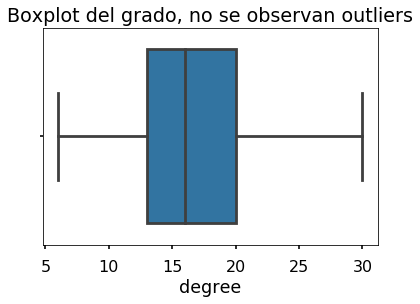

In [20]:
sns.boxplot(data=df,x='degree')
plt.title('Boxplot del grado, no se observan outliers')

Text(0.5,0,'grado')

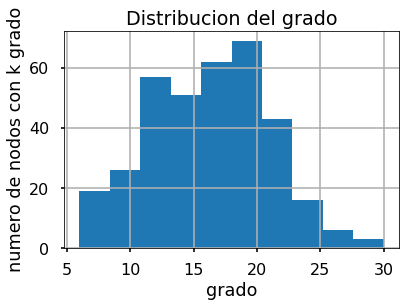

In [21]:
df.degree.hist()
plt.title('Distribucion del grado')
plt.ylabel('numero de nodos con k grado')
plt.xlabel('grado')

La distribucion del grado parece una normal.

Text(16.1534,0.081,'grado promedio')

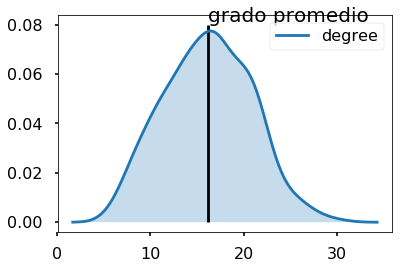

In [22]:
sns.kdeplot(df.degree, shade=True)
plt.vlines(df.degree.mean(),0,0.08)
plt.text(df.degree.mean(),0.081,'grado promedio',fontsize=20)

In [26]:
def measuring(red):
    dgr = nx.degree_centrality(red)
    clo = nx.closeness_centrality(red)
    har = nx.harmonic_centrality(red)
    eig = nx.eigenvector_centrality_numpy(red)
    bet = nx.betweenness_centrality(red)
    pgr = nx.pagerank(red)
    hits = nx.hits_numpy(red)
    
    centralities = pd.concat(
    [pd.Series(c) for c in (hits[1],eig,pgr,har,clo,hits[0],dgr,bet)],
    axis=1)
    centralities.columns = ["Authorities","Eigenvector", "PageRank",
                           "Harmonic_Closeness", "Closeness","Hubs",
                           "Degree", "Betweenness"]
    centralities["Harmonic_Closeness"] /= centralities.shape[0]
    
    return centralities

In [27]:
measuring(red_dimer_con_cofact).sort_values('Betweenness', ascending=False).head()

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
340     0.004512     0.064825  0.003769            0.384848   0.330198   
140     0.004171     0.059920  0.003370            0.378409   0.326816   
106     0.002000     0.028729  0.002964            0.342431   0.290804   
306     0.002934     0.042159  0.002790            0.343351   0.293724   
143     0.003713     0.053342  0.002724            0.365909   0.322018   

         Hubs    Degree  Betweenness  
340  0.004512  0.068376     0.072757  
140  0.004171  0.059829     0.063190  
106  0.002000  0.048433     0.048209  
306  0.002934  0.045584     0.044391  
143  0.003713  0.048433     0.042443

In [30]:
def corr_centralities(df_measuring, m=10):
    c_df = df_measuring.corr()
    ll_triangle = np.tri(c_df.shape[0], k=-1)
    c_df *= ll_triangle
    c_series = c_df.stack().sort_values().tail(m)
    return c_series

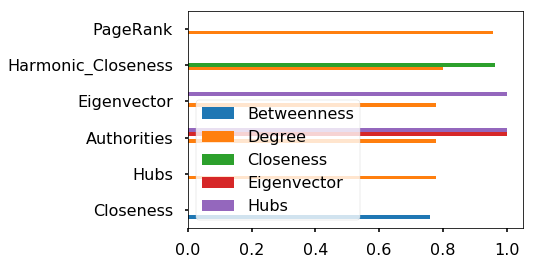

In [31]:
corr_centralities(measuring(red_dimer_con_cofact), m=10).unstack(0).plot.barh()

In [32]:
def plot_centralities(df_measuring,col1,col2):
    X=col1
    Y=col2
    limits = pd.concat([df_measuring[[X,Y]].min(),df_measuring[[X,Y]].max()], axis=1).values
    df_measuring.plot(kind='scatter', x=X, y=Y, xlim=limits[0],ylim=limits[1],s=75,logy=False,alpha=0.6)

In [33]:
df_measuring = measuring(red_dimer_con_cofact)

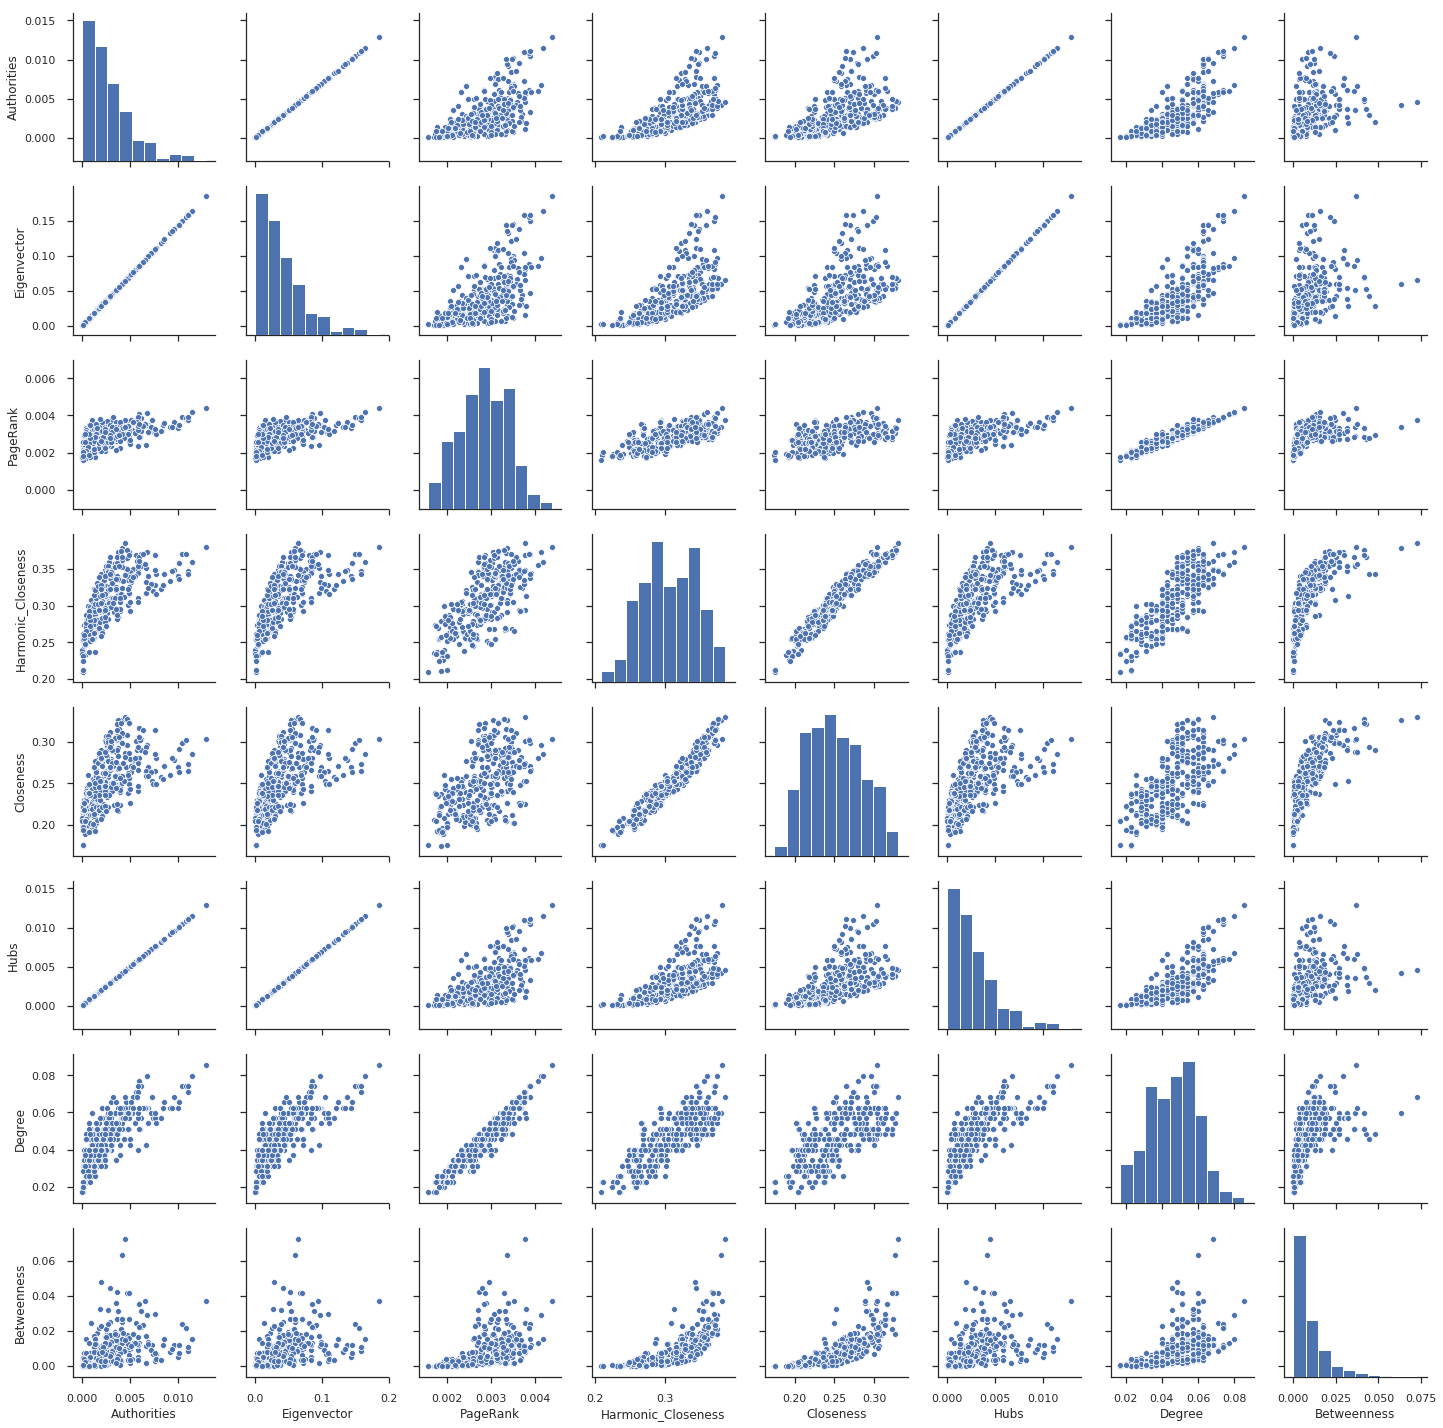

In [34]:
sns.set(style="ticks")
sns.pairplot(df_measuring)

## Analsis de comunidades

In [36]:
import community

In [37]:
part = community.best_partition(red_dimer_con_cofact)

# mapear comunidades para pymol

In [57]:
c_0 = [nodo for nodo, comunidad in part.items()if comunidad == 0]
c_1 = [nodo for nodo, comunidad in part.items()if comunidad == 1]
c_2 = [nodo for nodo, comunidad in part.items()if comunidad == 2]
c_3 = [nodo for nodo, comunidad in part.items()if comunidad == 3]
c_4 = [nodo for nodo, comunidad in part.items()if comunidad == 4]
c_5 = [nodo for nodo, comunidad in part.items()if comunidad == 5]

In [58]:
print(*c_0, sep='+')

2+3+4+5+6+173+174+175+7+172+8+9+171+159+10+11+12+13+161+170+14+15+169+16+17+148+18+132+19+20+21+147+149+22+49+50+53+23+54+24+25+130+146+26+51+52+27+57+28+29+30+31+99+58+32+34+33+35+62+97+96+95+98+162+163+166+104+131+165+55+60+61+56+59+125+126+127+128+129+145+133+160+167+164+168


In [59]:
print(*c_1, sep='+')

151+109+105+134+106+135+107+108+136+138+144+137+139+140+142+326+141+143+150+152+153+154+155+325+327+328+329+343+344+345+156+157+158+176+177+234+233+235+296+297+295+298+299+292+293+294+322+323+324


In [60]:
print(*c_2, sep='+')

36+63+37+64+65+91+92+93+100+38+44+47+48+66+101+39+43+67+89+102+40+41+42+45+46+68+103+69+110+114+90+88+117+70+71+72+73+113+116+74+85+75+76+112+77+78+79+80+81+82+83+84+86+87+120+121+94+122+118+123+124+111+115+119+274+275+276+277+278+279+280+281+282+283+284


In [61]:
print(*c_3, sep='+')

319+320+312+315+316+246+330+236+263+237+264+265+291+300+238+247+248+266+301+239+243+244+267+289+302+240+241+242+245+268+269+303+310+314+290+288+317+270+271+272+273+313+285+286+287+318+321+311


In [62]:
print(*c_4, sep='+')

339+307+338+340+341+342+309+305+306+335+308+336+337+352+353+354+355+356+357+358+376+377


In [63]:
print(*c_5, sep='+')

202+203+204+205+206+373+374+375+207+372+208+209+371+210+211+212+213+361+370+214+215+363+369+216+217+218+332+348+219+220+221+347+349+222+249+250+253+223+254+224+225+346+226+251+252+257+227+228+229+230+231+232+258+262+366+362+304+331+364+365+255+260+261+256+259+333+334+360+359+350+351+367+368


# Analisis de comunidad sigue

In [64]:
community.modularity(part,red_dimer_con_cofact)

0.5917213527396774

In [65]:
induced = community.induced_graph(part, red_dimer_con_cofact)

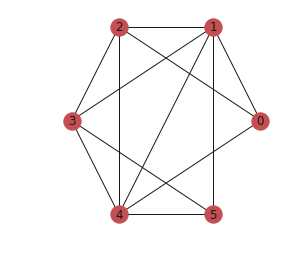

In [66]:
plt.figure(figsize=(3,3))
nx.draw_circular(induced,with_labels=True)

In [67]:
top_bet = measuring(red_dimer_con_cofact).sort_values('Betweenness', ascending=False).head(20).index.values

In [68]:
top_bet

array(['340', '140', '106', '306', '143', '343', '342', '304', '301',
       '104', '145', '344', '359', '139', '346', '146', '329', '101',
       '141', '144'], dtype=object)

In [69]:
# a que comunidad pertenecen los de mayor betweness
for i in top_bet:
    print(i,part[i])

340 4
140 1
106 1
306 4
143 1
343 1
342 4
304 5
301 3
104 0
145 0
344 1
359 5
139 1
346 5
146 0
329 1
101 2
141 1
144 1


Text(0,0.5,'comunidad')

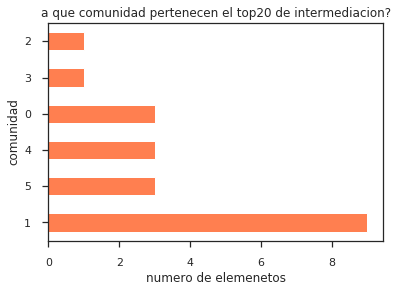

In [70]:
pd.DataFrame([(i,part[i]) for i in top_bet ]).set_index(0)[1].value_counts().plot.barh(
    title='a que comunidad pertenecen el top20 de intermediacion?', color='coral')
plt.xlabel('numero de elemenetos')
plt.ylabel('comunidad')

In [71]:
df_measuring.describe()

Authorities  Eigenvector    PageRank  Harmonic_Closeness   Closeness  \
count   352.000000   352.000000  352.000000          352.000000  352.000000   
mean      0.002841     0.040815    0.002841            0.305581    0.250578   
std       0.002389     0.034327    0.000550            0.038214    0.034391   
min       0.000068     0.000984    0.001576            0.208950    0.174367   
25%       0.001054     0.015141    0.002482            0.276629    0.222222   
50%       0.002273     0.032655    0.002853            0.303937    0.248672   
75%       0.003865     0.055535    0.003277            0.338327    0.277690   
max       0.012895     0.185268    0.004391            0.384848    0.330198   

             Hubs      Degree  Betweenness  
count  352.000000  352.000000   352.000000  
mean     0.002841    0.046021     0.008762  
std      0.002389    0.013272     0.010098  
min      0.000068    0.017094     0.000000  
25%      0.001054    0.037037     0.001747  
50%      0.002273    0.045584     0.004940  
75%      0.003865    0.056980     0.012534  
max      0.012895    0.085470     0.072757

In [72]:
df_measuring.loc[top_bet]

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
340     0.004512     0.064825  0.003769            0.384848   0.330198   
140     0.004171     0.059920  0.003370            0.378409   0.326816   
106     0.002000     0.028729  0.002964            0.342431   0.290804   
306     0.002934     0.042159  0.002790            0.343351   0.293724   
143     0.003713     0.053342  0.002724            0.365909   0.322018   
343     0.004891     0.070273  0.002859            0.368324   0.322314   
342     0.004748     0.068211  0.003298            0.375521   0.327425   
304     0.006586     0.094622  0.003525            0.357170   0.288177   
301     0.012895     0.185268  0.004391            0.380019   0.303109   
104     0.003607     0.051825  0.003382            0.355269   0.288177   
145     0.003568     0.051264  0.002890            0.353314   0.302326   
344     0.005978     0.085889  0.002841            0.366004   0.316501   
359     0.001939     0.027856  0.003801            0.312862   0.252518   
139     0.002717     0.039032  0.002718            0.347727   0.301806   
346     0.006111     0.087798  0.003184            0.353409   0.290323   
146     0.003738     0.053709  0.003326            0.354593   0.292744   
329     0.007589     0.109031  0.003077            0.368987   0.314235   
101     0.006744     0.096895  0.004135            0.373106   0.296453   
141     0.004891     0.070262  0.003168            0.372348   0.323502   
144     0.003647     0.052398  0.002717            0.359943   0.313953   

         Hubs    Degree  Betweenness  
340  0.004512  0.068376     0.072757  
140  0.004171  0.059829     0.063190  
106  0.002000  0.048433     0.048209  
306  0.002934  0.045584     0.044391  
143  0.003713  0.048433     0.042443  
343  0.004891  0.051282     0.041748  
342  0.004748  0.059829     0.041465  
304  0.006586  0.062678     0.037162  
301  0.012895  0.085470     0.036891  
104  0.003607  0.059829     0.036229  
145  0.003568  0.051282     0.036182  
344  0.005978  0.051282     0.035514  
359  0.001939  0.056980     0.032346  
139  0.002717  0.045584     0.031736  
346  0.006111  0.056980     0.031592  
146  0.003738  0.059829     0.031291  
329  0.007589  0.056980     0.029612  
101  0.006744  0.079772     0.029338  
141  0.004891  0.056980     0.026622  
144  0.003647  0.048433     0.026604

Text(0,0.5,'Comunidad')

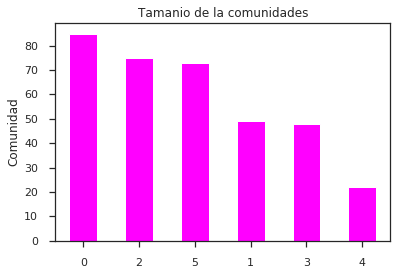

In [73]:
pd.Series(part).value_counts().plot.bar(rot=0, title='Tamanio de la comunidades', color='magenta')
plt.ylabel('Numero de nodos')
plt.ylabel('Comunidad')

------

## Dimer sin cofact Red

### Metricas globales

In [74]:
print(nx.info(red_dimer_sin_cofact))

Name: dimer_sin_cofact_clean2
Type: Graph
Number of nodes: 352
Number of edges: 2844
Average degree:  16.1591


In [75]:
# densidad, porcentaje de enlaces de todos los posibles que puede haber. #Densidad baja#
nx.density(red_dimer_sin_cofact)

0.04603729603729604

In [76]:
# clustering promedio
nx.average_clustering(red_dimer_sin_cofact)

0.5458223672057246

In [77]:
# promedio de camnino mas corto
nx.average_shortest_path_length(red_dimer_sin_cofact)

4.068359880859881

In [78]:
# porcentaje de triangulos existentes de todos los posibles tringulos posibles
nx.transitivity(red_dimer_sin_cofact)

0.5008394075270417

no es una red aleatoria, no cumple todas las propiedades de ella, como clustering y promedio de camino mas corto

In [79]:
# el camino mas largo entre todos los caminos posibles sobre cada par de nodos
nx.diameter(red_dimer_sin_cofact)

9

In [80]:
# el camino mas corto sobre todos los caminos mas largos de los caminos posibles de cada par de nodos
nx.radius(red_dimer_sin_cofact)

5

In [81]:
# excentricidad es la maxima distancia de un nodo a todos los demas en la red
# nodos con una excentricidad igual al radio

nx.center(red_dimer_sin_cofact)

['144', '142', '143', '340', '341', '342', '343', '344']

In [82]:
df = pd.DataFrame([i for i in red_dimer_sin_cofact.degree], columns=['node_id','degree'])
df.head()

node_id  degree
0       2       7
1       3       8
2       4      11
3       5      12
4     175      14

In [83]:
# grado promedio
df.mean()

node_id          inf
degree     16.159091
dtype: float64

Text(0.5,1,'Boxplot del grado, no se observan outliers')

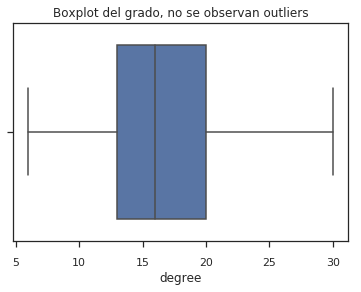

In [84]:
sns.boxplot(data=df,x='degree')
plt.title('Boxplot del grado, no se observan outliers')

Text(0.5,0,'grado')

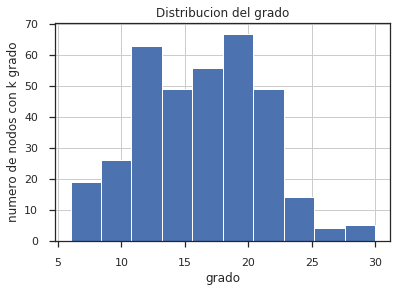

In [85]:
df.degree.hist()
plt.title('Distribucion del grado')
plt.ylabel('numero de nodos con k grado')
plt.xlabel('grado')

La distribucion del grado parece una normal.

Text(16.1591,0.081,'grado promedio')

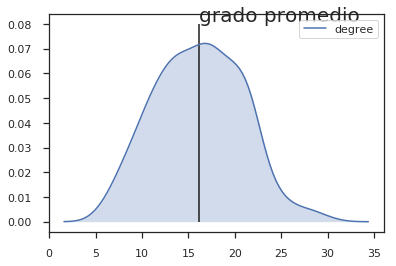

In [86]:
sns.kdeplot(df.degree, shade=True)
plt.vlines(df.degree.mean(),0,0.08)
plt.text(df.degree.mean(),0.081,'grado promedio',fontsize=20)

In [87]:
measuring(red_dimer_sin_cofact).sort_values('Betweenness', ascending=False).head()

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
340     0.004824     0.071711  0.003624            0.384848   0.333017   
140     0.004446     0.066097  0.003484            0.381297   0.328652   
306     0.002495     0.037096  0.002993            0.346117   0.296703   
342     0.004844     0.072006  0.003290            0.378125   0.329887   
143     0.004596     0.068316  0.002844            0.374148   0.329577   

         Hubs    Degree  Betweenness  
340  0.004824  0.065527     0.071437  
140  0.004446  0.062678     0.059427  
306  0.002495  0.048433     0.050703  
342  0.004844  0.059829     0.042696  
143  0.004596  0.051282     0.042002

In [88]:
pd.read_csv('networks_scripts/data_csv/dimer_sin_cofact.csv').sort_values('betweenesscentrality', ascending=False).head()

Id  Label  timeset  degree  weighted degree  Eccentricity  \
171  340    340      NaN      23               23             5   
158  140    140      NaN      22               22             6   
328  306    306      NaN      17               17             6   
181  342    342      NaN      21               21             5   
162  143    143      NaN      18               18             5   

     closnesscentrality  harmonicclosnesscentrality  betweenesscentrality  \
171            0.333017                    0.385945              0.071437   
158            0.328652                    0.382384              0.059427   
328            0.296703                    0.347104              0.050703   
181            0.329887                    0.379202              0.042696   
162            0.329577                    0.375214              0.042002   

     modularity_class  clustering  triangles  
171                 5    0.379447         96  
158                 2    0.389610         90  
328                 5    0.463235         63  
181                 5    0.428571         90  
162                 2    0.457516         70

In [89]:
df_measuring = measuring(red_dimer_sin_cofact)

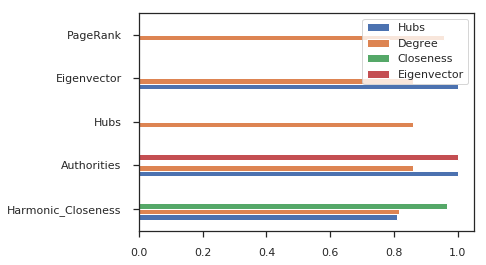

In [90]:
corr_centralities(measuring(red_dimer_sin_cofact), m=10).unstack(0).plot.barh()

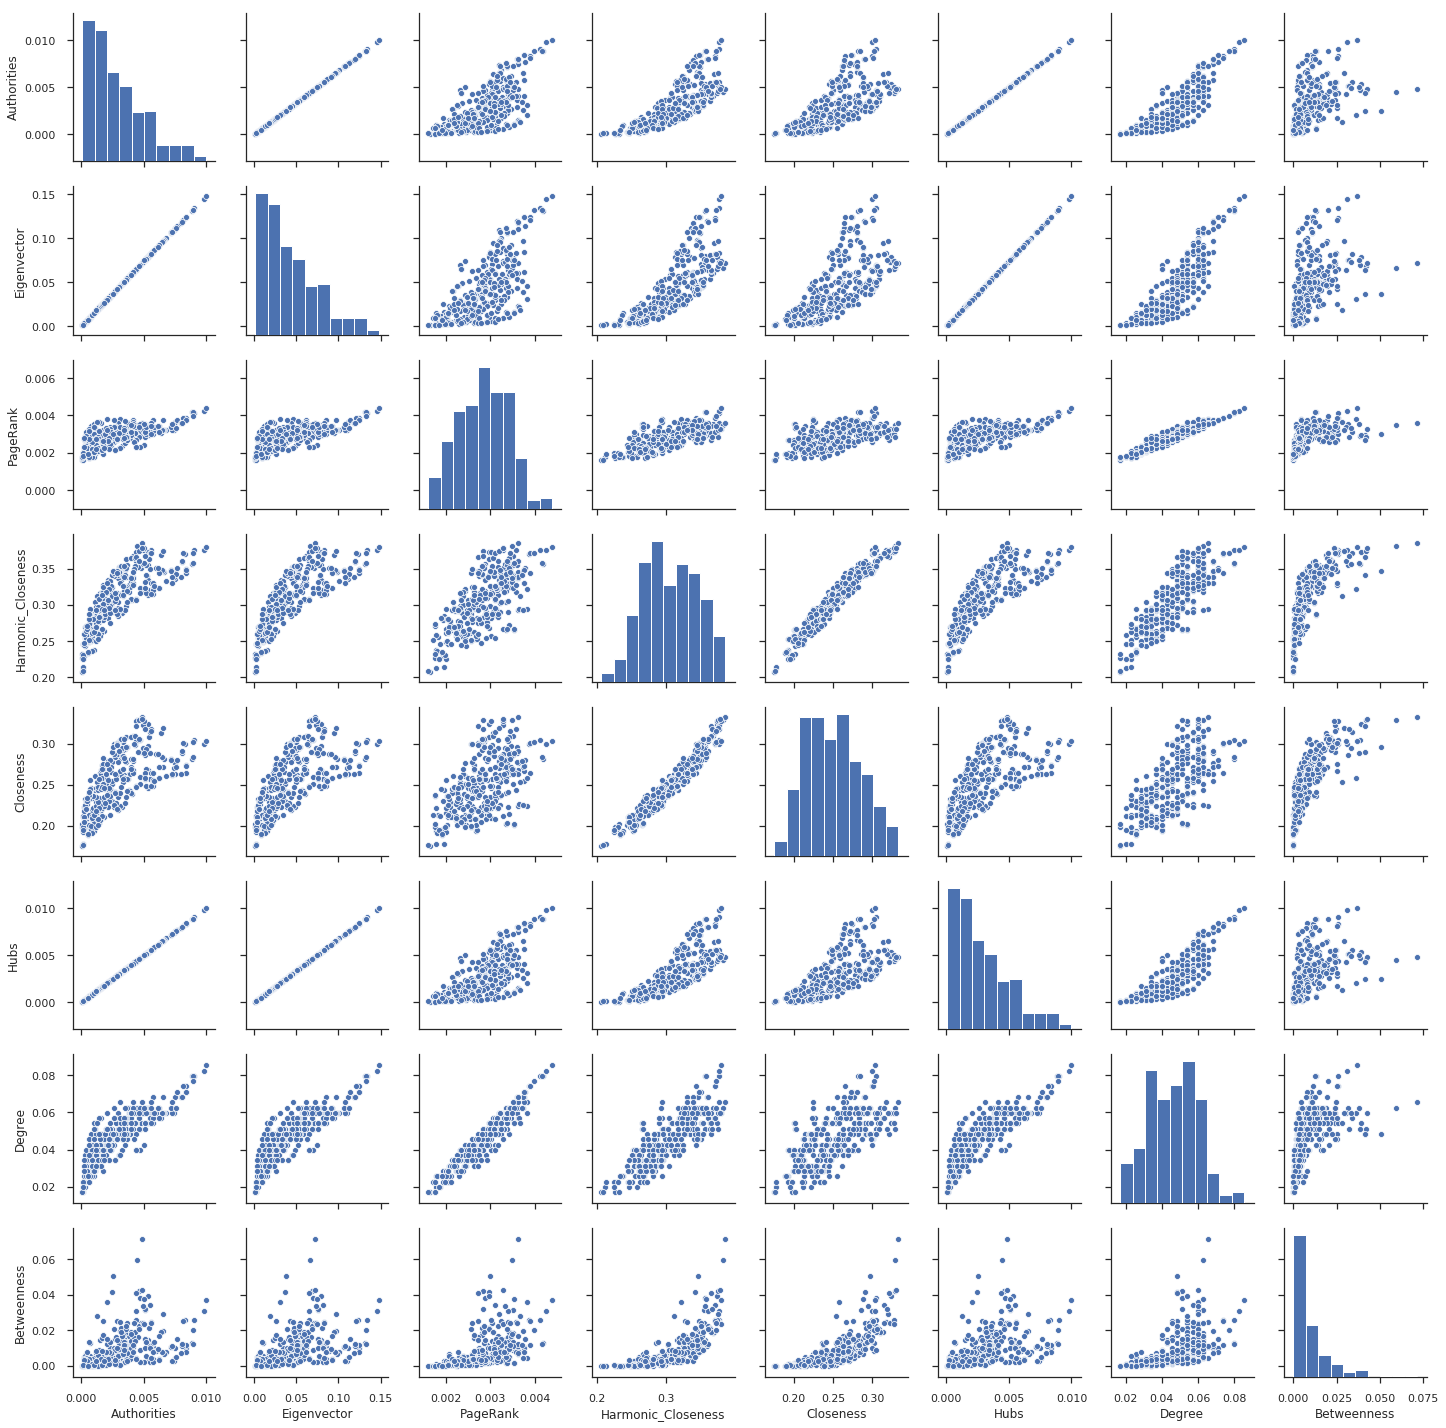

In [91]:
sns.set(style="ticks")
sns.pairplot(df_measuring)

## Analsis de comunidades

In [93]:
part = community.best_partition(red_dimer_sin_cofact)

# mapear comunidades para pymol

In [94]:
c_0 = [nodo for nodo, comunidad in part.items()if comunidad == 0]
c_1 = [nodo for nodo, comunidad in part.items()if comunidad == 1]
c_2 = [nodo for nodo, comunidad in part.items()if comunidad == 2]
c_3 = [nodo for nodo, comunidad in part.items()if comunidad == 3]
c_4 = [nodo for nodo, comunidad in part.items()if comunidad == 4]
c_5 = [nodo for nodo, comunidad in part.items()if comunidad == 5]

In [95]:
print(*c_0, sep='+')

2+3+4+5+175+6+173+174+7+172+8+9+171+10+11+12+13+161+170+14+15+163+169+16+17+18+132+148+19+20+21+147+149+22+49+50+53+23+54+24+25+146+26+51+52+27+57+28+29+30+31+145+58+32+61+62+103+162+166+104+131+165+55+60+56+59+105+133+134+160+106+135+159+136+137+150+151+152+153+154+155+156+157+158+176+177+167+164+168


In [96]:
print(*c_1, sep='+')

46+130+99+34+33+35+96+97+98+36+63+37+64+65+91+92+93+100+38+44+47+48+66+101+39+43+67+89+102+40+41+42+45+68+69+110+111+114+90+88+117+118+70+71+72+73+113+116+76+74+85+75+112+77+78+79+80+81+82+83+84+86+87+120+121+94+95+122+123+124+125+126+127+128+129+115+119+283


In [97]:
print(*c_2, sep='+')

109+319+323+108+107+138+139+140+141+142+326+143+325+327+328+233+234+235+296+297+295+298+293+292+321+294+322+324+320


In [98]:
print(*c_3, sep='+')

144+339+307+340+341+342+343+359+309+277+278+279+280+281+282+304+305+333+334+306+335+308+336+338+337+350+351+352+353+354+355+356+357+358+376+377


In [99]:
print(*c_4, sep='+')

312+315+316+274+329+344+345+330+236+263+299+237+264+265+291+300+238+244+247+248+266+301+239+243+267+289+302+240+241+242+245+246+268+269+303+314+331+290+317+270+271+272+313+273+310+285+275+276+284+286+287+288+318+311


In [101]:
print(*c_5, sep='+')

202+203+204+205+375+206+373+374+207+372+208+209+371+210+211+212+213+370+214+215+363+369+216+217+218+332+348+219+220+347+349+221+222+249+250+253+223+254+224+225+346+226+251+252+257+227+228+231+229+230+258+232+261+262+361+362+255+256+260+259+360+367+364+365+366+368


# analisis comunidad sigue

In [102]:
community.modularity(part,red_dimer_sin_cofact)

0.6058759181122051

In [103]:
induced = community.induced_graph(part, red_dimer_sin_cofact)

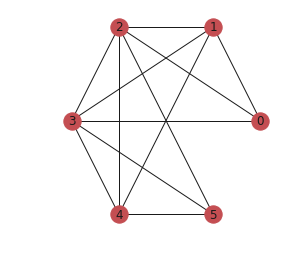

In [104]:
plt.figure(figsize=(3,3))
nx.draw_circular(induced,with_labels=True)

In [105]:
top_bet = measuring(red_dimer_sin_cofact).sort_values('Betweenness', ascending=False).head(20).index.values

In [106]:
top_bet

array(['340', '140', '306', '342', '143', '106', '343', '144', '145',
       '304', '301', '159', '328', '346', '344', '104', '101', '105',
       '329', '359'], dtype=object)

In [107]:
# a que comunidad pertenecen los de mayor betweness
for i in top_bet:
    print(i,part[i])

340 3
140 2
306 3
342 3
143 2
106 0
343 3
144 3
145 0
304 3
301 4
159 0
328 2
346 5
344 4
104 0
101 1
105 0
329 4
359 3


Text(0,0.5,'comunidad')

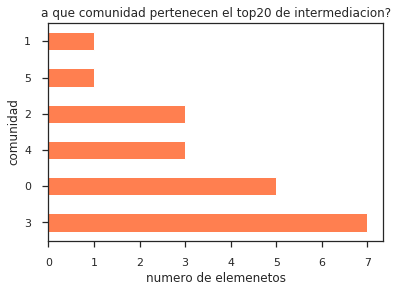

In [108]:
pd.DataFrame([(i,part[i]) for i in top_bet ]).set_index(0)[1].value_counts().plot.barh(
    title='a que comunidad pertenecen el top20 de intermediacion?', color='coral')
plt.xlabel('numero de elemenetos')
plt.ylabel('comunidad')

In [109]:
df_measuring.describe()

Authorities  Eigenvector    PageRank  Harmonic_Closeness   Closeness  \
count   352.000000   352.000000  352.000000          352.000000  352.000000   
mean      0.002841     0.042231    0.002841            0.305457    0.250632   
std       0.002191     0.032564    0.000559            0.039128    0.034983   
min       0.000075     0.001112    0.001595            0.206701    0.175325   
25%       0.001139     0.016927    0.002421            0.275685    0.222398   
50%       0.002288     0.034017    0.002851            0.304508    0.247969   
75%       0.004108     0.061072    0.003270            0.338192    0.276869   
max       0.009966     0.148150    0.004394            0.384848    0.333017   

             Hubs      Degree  Betweenness  
count  352.000000  352.000000   352.000000  
mean     0.002841    0.046037     0.008767  
std      0.002191    0.013507     0.010229  
min      0.000075    0.017094     0.000005  
25%      0.001139    0.037037     0.002032  
50%      0.002288    0.045584     0.004796  
75%      0.004108    0.056980     0.012346  
max      0.009966    0.085470     0.071437

In [110]:
df_measuring.loc[top_bet]

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
340     0.004824     0.071711  0.003624            0.384848   0.333017   
140     0.004446     0.066097  0.003484            0.381297   0.328652   
306     0.002495     0.037096  0.002993            0.346117   0.296703   
342     0.004844     0.072006  0.003290            0.378125   0.329887   
143     0.004596     0.068316  0.002844            0.374148   0.329577   
106     0.002479     0.036856  0.002975            0.341673   0.290323   
343     0.004337     0.064472  0.002712            0.365294   0.321429   
144     0.005331     0.079255  0.002966            0.372680   0.323801   
145     0.004672     0.069447  0.002876            0.355824   0.304423   
304     0.005044     0.074979  0.003543            0.357528   0.288651   
301     0.009966     0.148150  0.004394            0.379451   0.303109   
159     0.002069     0.030755  0.003830            0.321686   0.258278   
328     0.005511     0.081921  0.003113            0.370928   0.315081   
346     0.004938     0.073400  0.003337            0.356534   0.294463   
344     0.005098     0.075780  0.002835            0.366667   0.318512   
104     0.005100     0.075808  0.003520            0.355208   0.286064   
101     0.009773     0.145275  0.004250            0.375758   0.299744   
105     0.004332     0.064401  0.003396            0.360890   0.304159   
329     0.006534     0.097127  0.003202            0.374621   0.319964   
359     0.001272     0.018913  0.003659            0.311445   0.253796   

         Hubs    Degree  Betweenness  
340  0.004824  0.065527     0.071437  
140  0.004446  0.062678     0.059427  
306  0.002495  0.048433     0.050703  
342  0.004844  0.059829     0.042696  
143  0.004596  0.051282     0.042002  
106  0.002479  0.048433     0.041616  
343  0.004337  0.048433     0.041159  
144  0.005331  0.054131     0.039017  
145  0.004672  0.051282     0.038314  
304  0.005044  0.062678     0.037713  
301  0.009966  0.085470     0.036950  
159  0.002069  0.059829     0.035874  
328  0.005511  0.056980     0.033971  
346  0.004938  0.059829     0.033352  
344  0.005098  0.051282     0.032194  
104  0.005100  0.062678     0.031586  
101  0.009773  0.082621     0.031103  
105  0.004332  0.059829     0.030591  
329  0.006534  0.059829     0.029209  
359  0.001272  0.054131     0.027826

Text(0,0.5,'Comunidad')

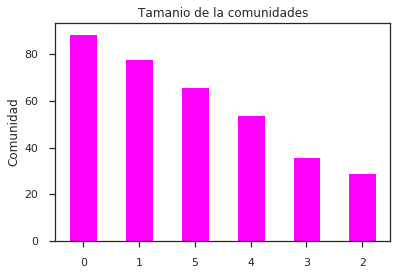

In [111]:
pd.Series(part).value_counts().plot.bar(rot=0, title='Tamanio de la comunidades', color='magenta')
plt.ylabel('Numero de nodos')
plt.ylabel('Comunidad')

-------

## tetra con cofact Red

### Metricas globales

In [112]:
print(nx.info(red_tetra_con_cofact))

Name: tetra_con_cofact_clean2_click
Type: Graph
Number of nodes: 352
Number of edges: 2829
Average degree:  16.0739


In [113]:
# densidad, porcentaje de enlaces de todos los posibles que puede haber. #Densidad baja#
nx.density(red_tetra_con_cofact)

0.045794483294483296

In [114]:
# clustering promedio
nx.average_clustering(red_tetra_con_cofact)

0.5612695500698782

In [115]:
# promedio de camnino mas corto
nx.average_shortest_path_length(red_tetra_con_cofact)

4.080209142709143

In [116]:
# porcentaje de triangulos existentes de todos los posibles tringulos posibles
nx.transitivity(red_tetra_con_cofact)

0.5050729435888673

no es una red aleatoria, no cumple todas las propiedades de ella, como clustering y promedio de camino mas corto

In [117]:
# el camino mas largo entre todos los caminos posibles sobre cada par de nodos
nx.diameter(red_tetra_con_cofact)

9

In [118]:
# el camino mas corto sobre todos los caminos mas largos de los caminos posibles de cada par de nodos
nx.radius(red_tetra_con_cofact)

5

In [119]:
# excentricidad es la maxima distancia de un nodo a todos los demas en la red
# nodos con una excentricidad igual al radio

nx.center(red_tetra_con_cofact)

['145',
 '128',
 '129',
 '144',
 '143',
 '140',
 '112',
 '141',
 '142',
 '340',
 '341',
 '328',
 '329',
 '342',
 '343',
 '344',
 '345',
 '312']

In [120]:
df = pd.DataFrame([i for i in red_tetra_con_cofact.degree], columns=['node_id','degree'])
df.head()

node_id  degree
0       2       8
1       3      13
2       4      11
3     174      17
4     175      14

In [121]:
# grado promedio
df.mean()

node_id          inf
degree     16.073864
dtype: float64

Text(0.5,1,'Boxplot del grado, no se observan outliers')

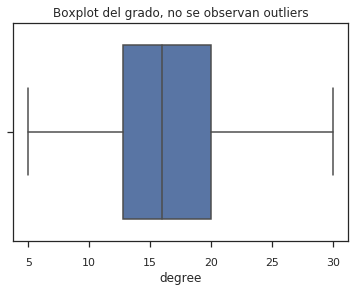

In [122]:
sns.boxplot(data=df,x='degree')
plt.title('Boxplot del grado, no se observan outliers')

Text(0.5,0,'grado')

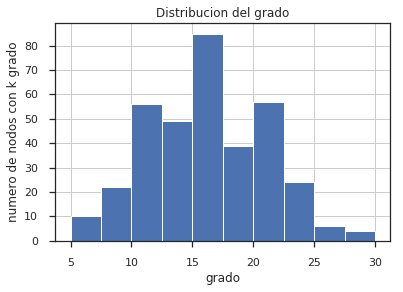

In [123]:
df.degree.hist()
plt.title('Distribucion del grado')
plt.ylabel('numero de nodos con k grado')
plt.xlabel('grado')

La distribucion del grado parece una normal.

Text(16.0739,0.081,'grado promedio')

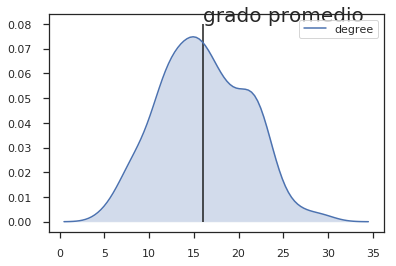

In [124]:
sns.kdeplot(df.degree, shade=True)
plt.vlines(df.degree.mean(),0,0.08)
plt.text(df.degree.mean(),0.081,'grado promedio',fontsize=20)

In [125]:
measuring(red_tetra_con_cofact).sort_values('Betweenness', ascending=False).head()

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
343     0.005862     0.082530  0.003374            0.391193   0.343444   
342     0.006390     0.089961  0.003701            0.399100   0.351000   
142     0.006793     0.095634  0.003650            0.397680   0.349602   
145     0.006984     0.098320  0.002939            0.372538   0.322314   
140     0.005137     0.072316  0.003449            0.383286   0.332701   

         Hubs    Degree  Betweenness  
343  0.005862  0.062678     0.078656  
342  0.006390  0.068376     0.062269  
142  0.006793  0.068376     0.055650  
145  0.006984  0.054131     0.053554  
140  0.005137  0.062678     0.052827

In [126]:
pd.read_csv('networks_scripts/data_csv/tetra_con_cofact.csv').sort_values('betweenesscentrality', ascending=False).head()

Id  Label  timeset  degree  weighted degree  Eccentricity  \
177  343    343      NaN      22               22             5   
176  342    342      NaN      24               24             5   
160  142    142      NaN      24               24             5   
54   145    145      NaN      19               19             5   
156  140    140      NaN      22               22             5   

     closnesscentrality  harmonicclosnesscentrality  betweenesscentrality  \
177            0.343444                    0.392308              0.078656   
176            0.351000                    0.400237              0.062269   
160            0.349602                    0.398813              0.055650   
54             0.322314                    0.373599              0.053554   
156            0.332701                    0.384378              0.052827   

     modularity_class  clustering  triangles  
177                 2    0.406926         94  
176                 5    0.387681        107  
160                 2    0.413043        114  
54                  0    0.485380         83  
156                 2    0.419913         97

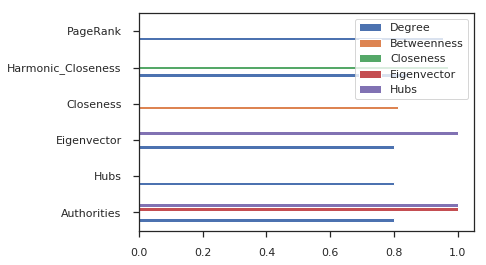

In [127]:
corr_centralities(measuring(red_tetra_con_cofact), m=10).unstack(0).plot.barh()

In [128]:
df_measuring = measuring(red_tetra_con_cofact)

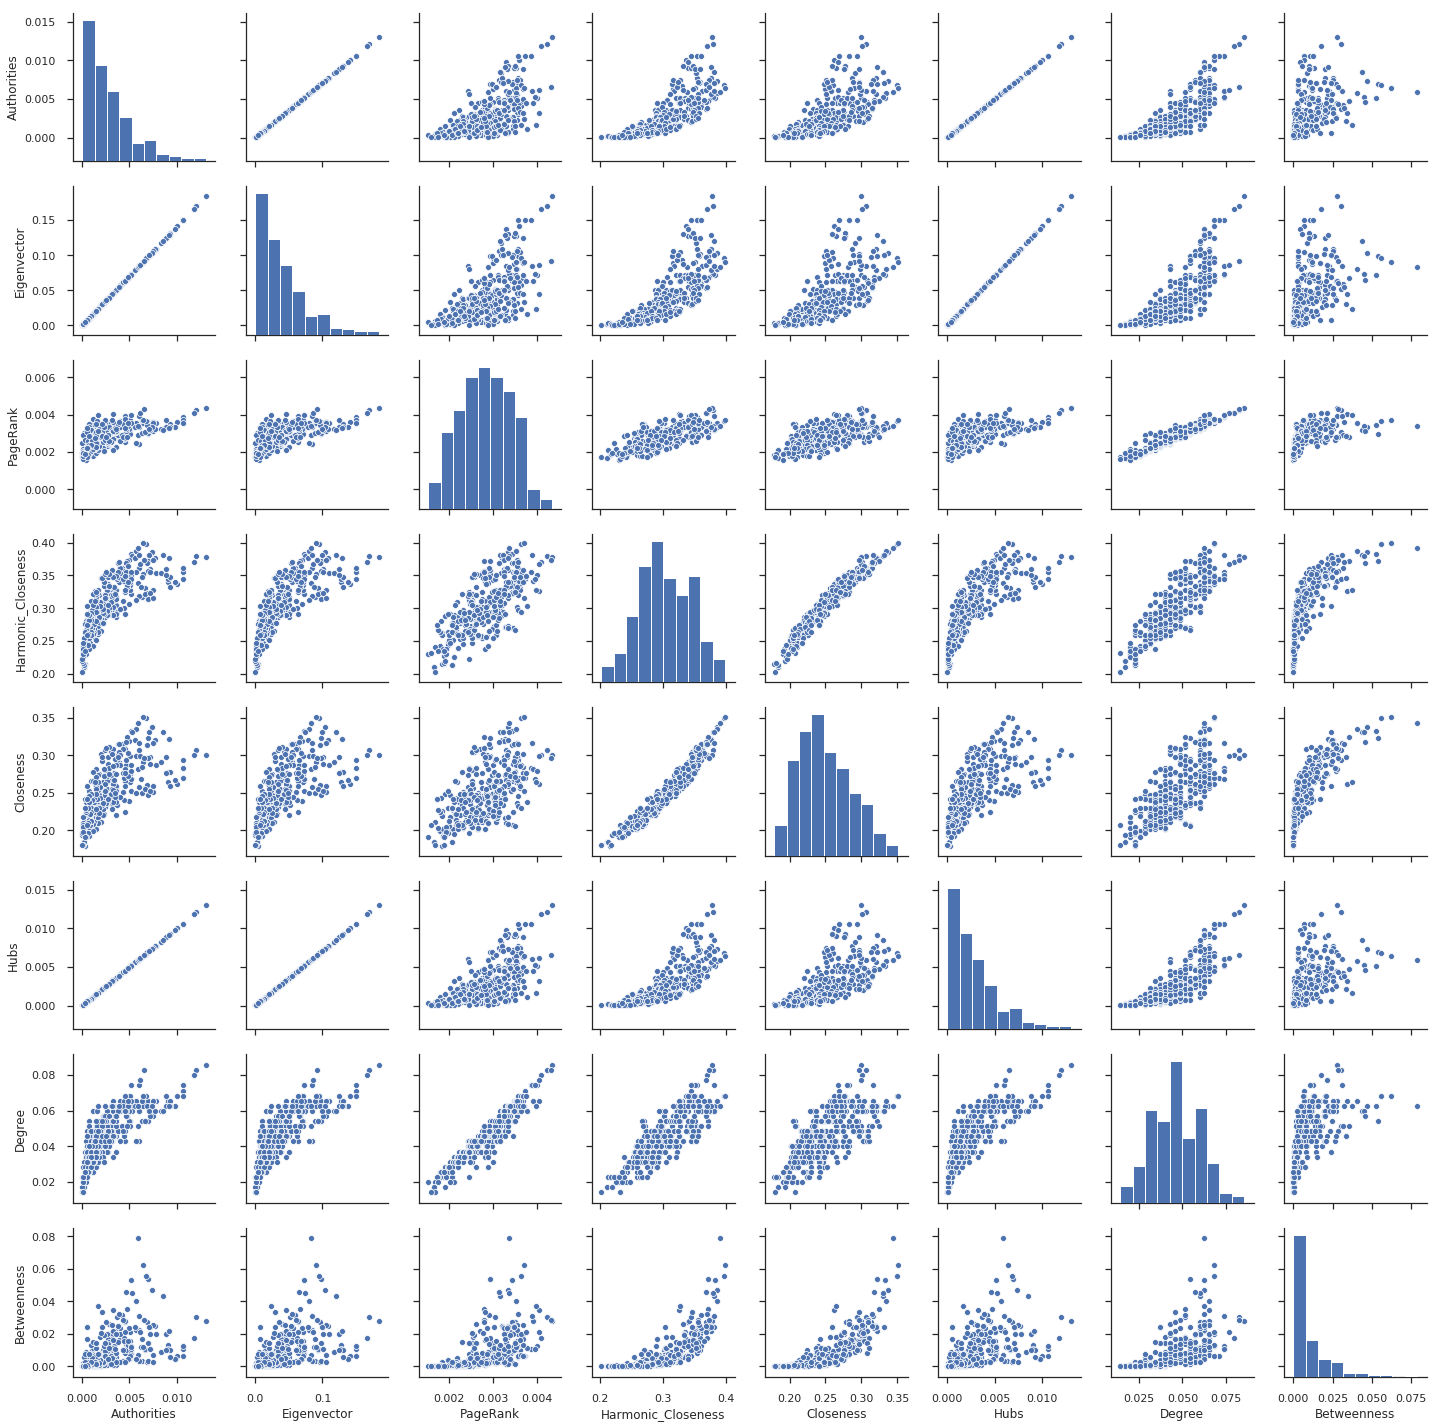

In [129]:
sns.set(style="ticks")
sns.pairplot(df_measuring)

## Analsis de comunidades

In [131]:
part = community.best_partition(red_tetra_con_cofact)

In [139]:
np.unique([x for x in part.values()])

array([0, 1, 2, 3, 4])

# mapear comunidades para pymol

In [140]:
c_0 = [nodo for nodo, comunidad in part.items()if comunidad == 0]
c_1 = [nodo for nodo, comunidad in part.items()if comunidad == 1]
c_2 = [nodo for nodo, comunidad in part.items()if comunidad == 2]
c_3 = [nodo for nodo, comunidad in part.items()if comunidad == 3]
c_4 = [nodo for nodo, comunidad in part.items()if comunidad == 4]
c_5 = [nodo for nodo, comunidad in part.items()if comunidad == 5]

In [141]:
print(*c_0, sep='+')

2+3+4+174+175+176+5+6+173+7+172+8+9+171+10+11+12+13+149+161+170+14+15+163+169+16+17+148+18+132+19+20+21+147+22+49+50+53+23+54+24+25+146+26+51+52+27+28+29+30+31+32+58+62+103+162+166+104+131+165+55+56+60+61+57+59+105+133+134+160+106+135+159+136+137+150+151+152+153+154+155+156+157+158+177+167+164+168


In [142]:
print(*c_1, sep='+')

46+130+99+145+33+34+97+35+96+95+98+36+63+126+37+64+65+91+93+100+38+47+48+66+101+39+43+44+67+89+102+40+41+42+45+68+69+110+114+90+84+88+70+83+85+71+82+72+73+81+78+79+80+74+75+77+76+86+113+87+92+94+118+121+122+123+124+125+127+128+129+111+115+144+109+112+116+117+119+120+341


In [143]:
print(*c_2, sep='+')

339+340+338+342+268+269+311+314+270+271+282+284+310+313+272+273+274+275+276+277+278+280+279+281+283+309+285+286+287+304+305+333+334+306+335+307+308+336+337+312+316+317+350+351+352+353+354


In [144]:
print(*c_3, sep='+')

107+108+143+138+139+140+326+141+142+327+328+325+329+343+344+345+246+330+299+234+233+235+296+297+295+298+236+263+237+264+265+291+292+293+300+238+247+248+266+301+239+243+244+267+289+302+240+241+242+245+303+331+290+288+294+322+318+323+324+315+319+320+321


In [145]:
print(*c_4, sep='+')

202+203+204+374+375+376+205+206+373+357+207+372+208+209+371+210+211+212+213+361+370+214+215+363+369+216+217+348+218+332+219+220+221+347+349+222+249+250+253+223+254+224+225+346+226+251+227+257+228+229+230+231+258+232+260+261+262+366+362+365+252+255+256+259+360+359+355+356+358+377+367+364+368


In [146]:
print(*c_5, sep='+')

---------------

In [153]:
community.modularity(part,red_tetra_con_cofact)

0.6194353637482615

In [154]:
induced = community.induced_graph(part, red_tetra_con_cofact)

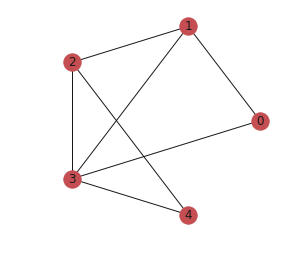

In [155]:
plt.figure(figsize=(3,3))
nx.draw_circular(induced,with_labels=True)

In [156]:
top_bet = measuring(red_tetra_con_cofact).sort_values('Betweenness', ascending=False).head(20).index.values

In [157]:
top_bet

array(['343', '342', '142', '145', '140', '143', '345', '340', '144',
       '141', '359', '344', '159', '306', '305', '138', '330', '106',
       '130', '301'], dtype=object)

In [158]:
# a que comunidad pertenecen los de mayor betweness
for i in top_bet:
    print(i,part[i])

343 3
342 2
142 3
145 1
140 3
143 3
345 3
340 2
144 1
141 3
359 4
344 3
159 0
306 2
305 2
138 3
330 3
106 0
130 1
301 3


Text(0,0.5,'comunidad')

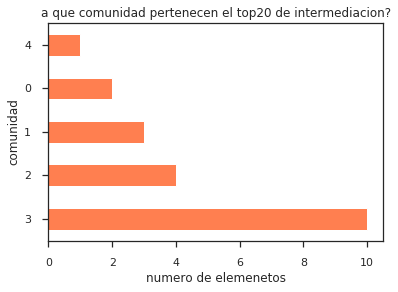

In [159]:
pd.DataFrame([(i,part[i]) for i in top_bet ]).set_index(0)[1].value_counts().plot.barh(
    title='a que comunidad pertenecen el top20 de intermediacion?', color='coral')
plt.xlabel('numero de elemenetos')
plt.ylabel('comunidad')

In [160]:
df_measuring.describe()

Authorities  Eigenvector    PageRank  Harmonic_Closeness   Closeness  \
count   352.000000   352.000000  352.000000          352.000000  352.000000   
mean      0.002841     0.039997    0.002841            0.303590    0.250177   
std       0.002506     0.035281    0.000576            0.041254    0.036368   
min       0.000020     0.000279    0.001542            0.202016    0.178899   
25%       0.000923     0.012996    0.002441            0.273481    0.222752   
50%       0.002105     0.029630    0.002862            0.299297    0.245283   
75%       0.003977     0.055997    0.003279            0.335819    0.275025   
max       0.013067     0.183972    0.004343            0.399100    0.351000   

             Hubs      Degree  Betweenness  
count  352.000000  352.000000   352.000000  
mean     0.002841    0.045794     0.008801  
std      0.002506    0.013893     0.011342  
min      0.000020    0.014245     0.000000  
25%      0.000923    0.036325     0.001324  
50%      0.002105    0.045584     0.004162  
75%      0.003977    0.056980     0.012068  
max      0.013067    0.085470     0.078656

In [161]:
df_measuring.loc[top_bet]

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
343     0.005862     0.082530  0.003374            0.391193   0.343444   
342     0.006390     0.089961  0.003701            0.399100   0.351000   
142     0.006793     0.095634  0.003650            0.397680   0.349602   
145     0.006984     0.098320  0.002939            0.372538   0.322314   
140     0.005137     0.072316  0.003449            0.383286   0.332701   
143     0.007350     0.103477  0.003348            0.385559   0.337176   
345     0.004594     0.064677  0.003144            0.369508   0.317073   
340     0.005222     0.073522  0.003362            0.379640   0.330508   
144     0.008488     0.119501  0.003167            0.381392   0.330508   
141     0.005717     0.080485  0.003533            0.386648   0.334924   
359     0.001628     0.022926  0.003975            0.327185   0.264307   
344     0.004751     0.066888  0.002810            0.372112   0.324699   
159     0.003214     0.045252  0.004040            0.326522   0.261940   
306     0.002119     0.029835  0.002829            0.345739   0.296954   
305     0.003895     0.054843  0.003577            0.370975   0.315081   
138     0.004182     0.058871  0.002922            0.361080   0.314516   
330     0.006025     0.084831  0.003897            0.381297   0.316216   
106     0.003677     0.051774  0.003041            0.344650   0.293970   
130     0.012054     0.169703  0.004226            0.379972   0.306283   
301     0.006505     0.091579  0.004312            0.373059   0.296453   

         Hubs    Degree  Betweenness  
343  0.005862  0.062678     0.078656  
342  0.006390  0.068376     0.062269  
142  0.006793  0.068376     0.055650  
145  0.006984  0.054131     0.053554  
140  0.005137  0.062678     0.052827  
143  0.007350  0.062678     0.046759  
345  0.004594  0.056980     0.045500  
340  0.005222  0.059829     0.044790  
144  0.008488  0.059829     0.043489  
141  0.005717  0.065527     0.040237  
359  0.001628  0.062678     0.037115  
344  0.004751  0.051282     0.035058  
159  0.003214  0.065527     0.034375  
306  0.002119  0.045584     0.033580  
305  0.003895  0.062678     0.032386  
138  0.004182  0.051282     0.031297  
330  0.006025  0.074074     0.030677  
106  0.003677  0.051282     0.030582  
130  0.012054  0.082621     0.030459  
301  0.006505  0.082621     0.028405

Text(0,0.5,'Comunidad')

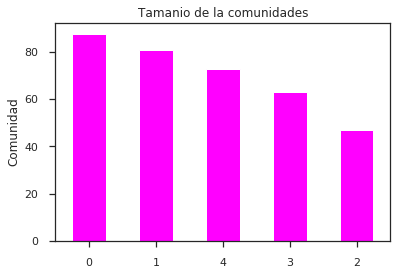

In [162]:
pd.Series(part).value_counts().plot.bar(rot=0, title='Tamanio de la comunidades', color='magenta')
plt.ylabel('Numero de nodos')
plt.ylabel('Comunidad')

--------

## Tetra sin cofact Red

### Metricas globales

In [163]:
print(nx.info(red_tetra_sin_cofact))

Name: tetra_sin_cofact_clean
Type: Graph
Number of nodes: 352
Number of edges: 2777
Average degree:  15.7784


In [164]:
# densidad, porcentaje de enlaces de todos los posibles que puede haber. #Densidad baja#
nx.density(red_tetra_sin_cofact)

0.04495273245273245

In [165]:
# clustering promedio
nx.average_clustering(red_tetra_sin_cofact)

0.5619867676443651

In [166]:
# promedio de camnino mas corto
nx.average_shortest_path_length(red_tetra_sin_cofact)

4.142838642838643

In [167]:
# porcentaje de triangulos existentes de todos los posibles tringulos posibles
nx.transitivity(red_tetra_sin_cofact)

0.5057823879938204

no es una red aleatoria, no cumple todas las propiedades de ella, como clustering y promedio de camino mas corto

In [168]:
# el camino mas largo entre todos los caminos posibles sobre cada par de nodos
nx.diameter(red_tetra_sin_cofact)

9

In [169]:
# el camino mas corto sobre todos los caminos mas largos de los caminos posibles de cada par de nodos
nx.radius(red_tetra_sin_cofact)

5

In [170]:
# excentricidad es la maxima distancia de un nodo a todos los demas en la red
# nodos con una excentricidad igual al radio

nx.center(red_tetra_sin_cofact)

['145',
 '128',
 '143',
 '144',
 '140',
 '141',
 '142',
 '340',
 '341',
 '328',
 '342',
 '343',
 '344',
 '312']

In [171]:
df = pd.DataFrame([i for i in red_tetra_sin_cofact.degree], columns=['node_id','degree'])
df.head()

node_id  degree
0       2       8
1       3      13
2       4      10
3     175      14
4       5      12

In [172]:
# grado promedio
df.mean()

node_id          inf
degree     15.778409
dtype: float64

Text(0.5,1,'Boxplot del grado, no se observan outliers')

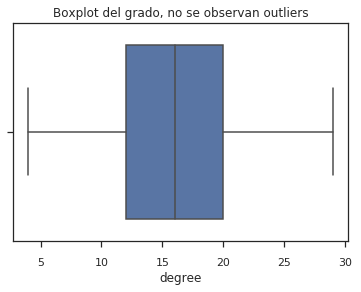

In [173]:
sns.boxplot(data=df,x='degree')
plt.title('Boxplot del grado, no se observan outliers')

Text(0.5,0,'grado')

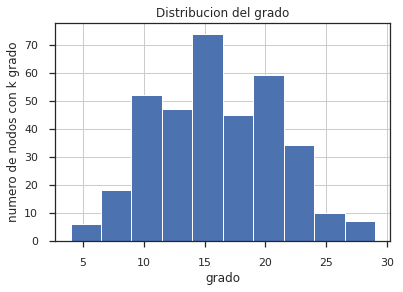

In [174]:
df.degree.hist()
plt.title('Distribucion del grado')
plt.ylabel('numero de nodos con k grado')
plt.xlabel('grado')

La distribucion del grado parece una normal.

Text(15.7784,0.081,'grado promedio')

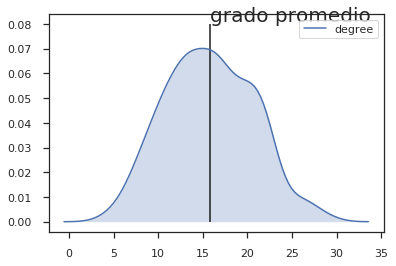

In [175]:
sns.kdeplot(df.degree, shade=True)
plt.vlines(df.degree.mean(),0,0.08)
plt.text(df.degree.mean(),0.081,'grado promedio',fontsize=20)

In [176]:
# No jala! con eigenvector ni con hits
def measuring(red):
    dgr = nx.degree_centrality(red)
    clo = nx.closeness_centrality(red)
    har = nx.harmonic_centrality(red)
    eig = nx.eigenvector_centrality_numpy(red)
    bet = nx.betweenness_centrality(red)
    pgr = nx.pagerank(red)
    hits = nx.hits_numpy(red)
    
    centralities = pd.concat(
    [pd.Series(c) for c in (hits[1],eig,pgr,har,clo,hits[0],dgr,bet)],
    axis=1)
    centralities.columns = ["Authorities","Eigenvector", "PageRank",
                           "Harmonic_Closeness", "Closeness","Hubs",
                           "Degree", "Betweenness"]
    centralities["Harmonic_Closeness"] /= centralities.shape[0]
    
    return centralities

In [177]:
measuring(red_tetra_sin_cofact).sort_values('Betweenness', ascending=False).head()

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
143     0.007644     0.102518  0.003562            0.382102   0.331445   
140     0.003967     0.053201  0.003419            0.375521   0.326208   
142     0.005790     0.077652  0.003489            0.388068   0.341440   
342     0.005714     0.076637  0.003472            0.379214   0.330820   
340     0.005781     0.077536  0.003530            0.377273   0.327731   

         Hubs    Degree  Betweenness  
143  0.007644  0.065527     0.060460  
140  0.003967  0.059829     0.056869  
142  0.005790  0.062678     0.054672  
342  0.005714  0.062678     0.050178  
340  0.005781  0.062678     0.049742

In [178]:
measuring(red_tetra_sin_cofact).sort_values('Degree', ascending=False).head()

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
101     0.014411     0.193277  0.004278            0.373769   0.295455   
301     0.005445     0.073028  0.004339            0.372727   0.296453   
300     0.005044     0.067655  0.004092            0.362926   0.293233   
130     0.012620     0.169253  0.004017            0.377320   0.307625   
47      0.012758     0.171102  0.004051            0.347491   0.265708   

         Hubs    Degree  Betweenness  
101  0.014411  0.082621     0.029769  
301  0.005445  0.082621     0.035074  
300  0.005044  0.076923     0.020357  
130  0.012620  0.076923     0.034117  
47   0.012758  0.076923     0.012756

In [179]:
def corr_centralities(df_measuring, m=10):
    c_df = df_measuring.corr()
    ll_triangle = np.tri(c_df.shape[0], k=-1)
    c_df *= ll_triangle
    c_series = c_df.stack().sort_values().tail(m)
    return c_series

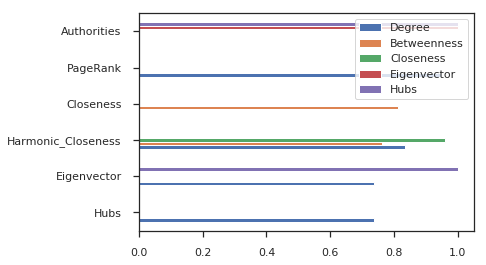

In [180]:
corr_centralities(measuring(red_tetra_sin_cofact), m=10).unstack(0).plot.barh()

In [181]:
def plot_centralities(df_measuring,col1,col2):
    X=col1
    Y=col2
    limits = pd.concat([df_measuring[[X,Y]].min(),df_measuring[[X,Y]].max()], axis=1).values
    df_measuring.plot(kind='scatter', x=X, y=Y, xlim=limits[0],ylim=limits[1],s=75,logy=False,alpha=0.6)

In [182]:
df_measuring = measuring(red_tetra_sin_cofact)

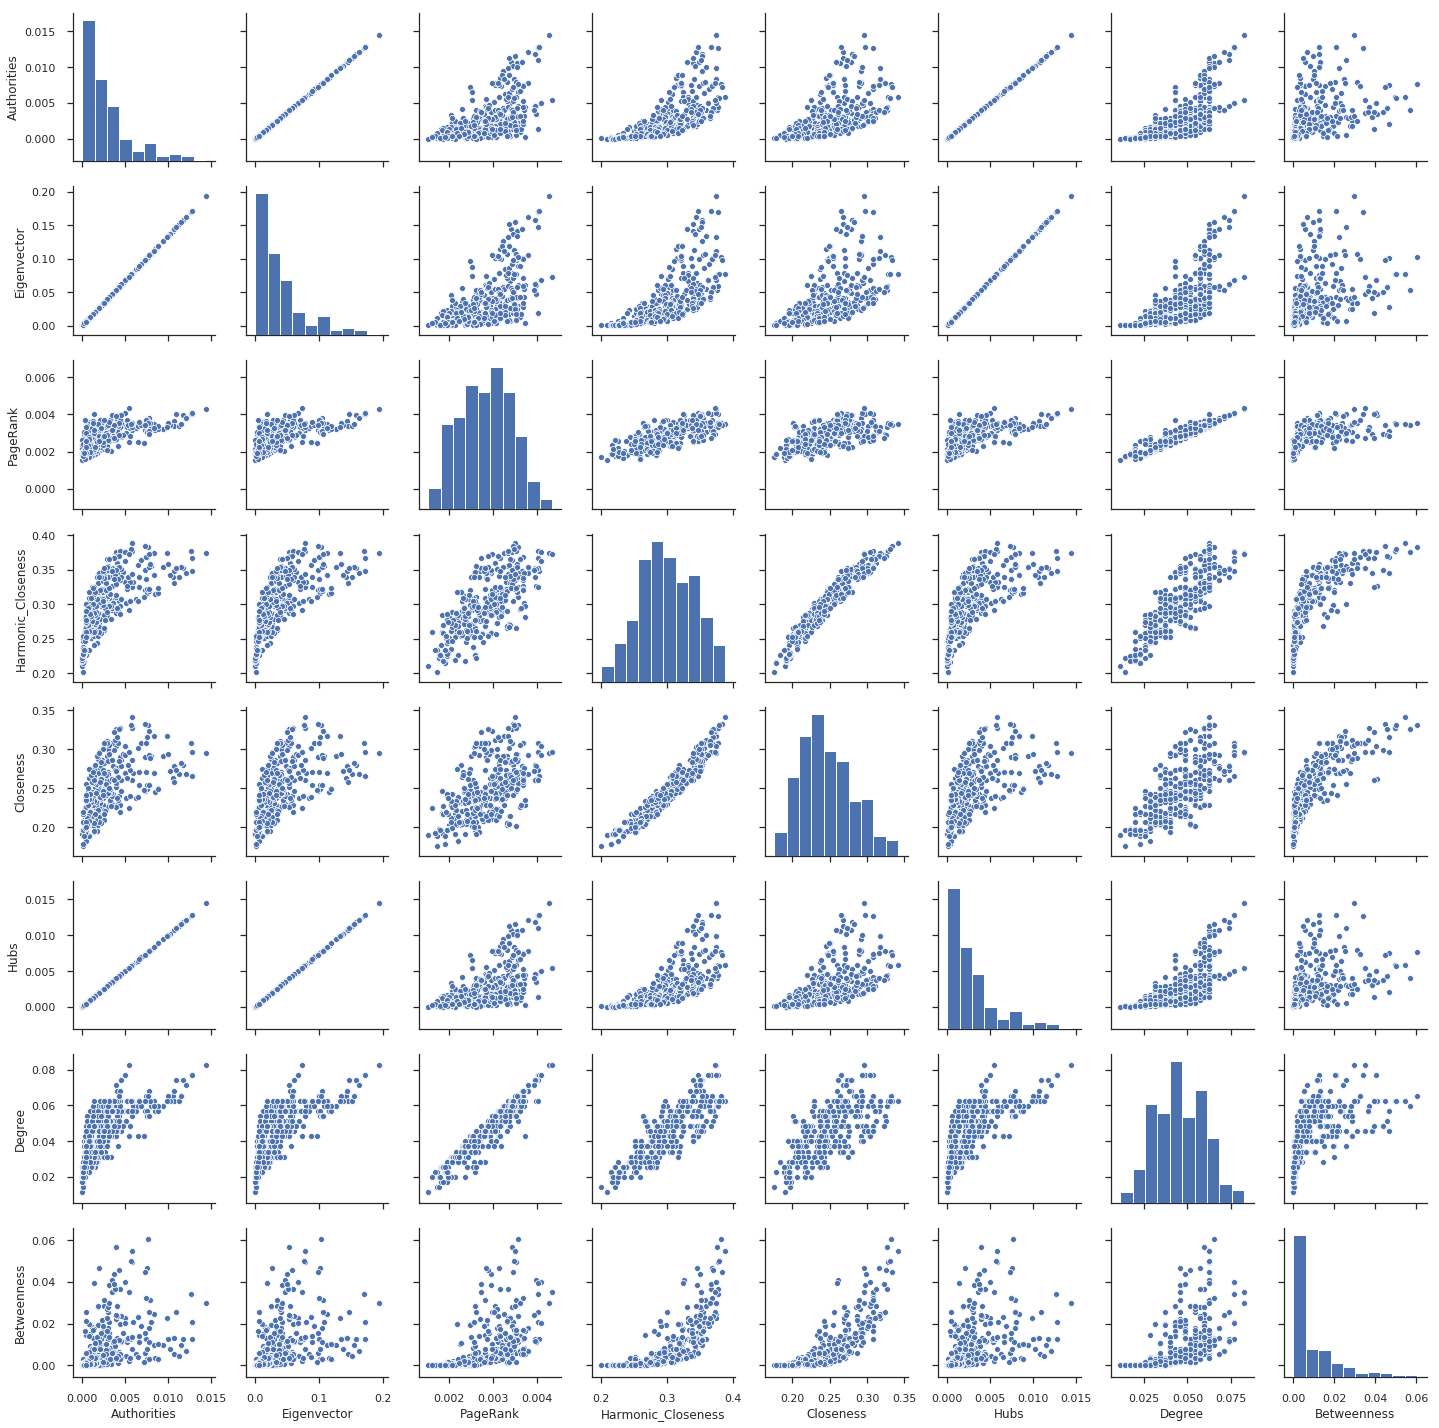

In [183]:
sns.set(style="ticks")
sns.pairplot(df_measuring)

## Analsis de comunidades

In [188]:
part = community.best_partition(red_tetra_sin_cofact)

In [200]:
np.unique([x for x in part.values()])

array([0, 1, 2, 3, 4, 5])

# mapear comunidades para pymol

In [189]:
c_0 = [nodo for nodo, comunidad in part.items()if comunidad == 0]
c_1 = [nodo for nodo, comunidad in part.items()if comunidad == 1]
c_2 = [nodo for nodo, comunidad in part.items()if comunidad == 2]
c_3 = [nodo for nodo, comunidad in part.items()if comunidad == 3]
c_4 = [nodo for nodo, comunidad in part.items()if comunidad == 4]
c_5 = [nodo for nodo, comunidad in part.items()if comunidad == 5]

In [190]:
print(*c_0, sep='+')

2+3+4+175+5+6+173+174+176+7+172+8+9+171+10+11+12+13+161+170+14+15+163+169+16+17+18+132+148+19+20+21+147+149+22+49+50+53+23+54+24+25+146+26+51+27+28+29+30+31+32+58+61+62+166+162+104+131+165+52+55+60+56+57+59+133+134+160+135+159+136+150+151+152+153+154+155+156+157+158+177+167+164+168


In [191]:
print(*c_1, sep='+')

46+130+99+145+34+97+33+35+96+95+98+36+63+37+64+65+91+92+93+100+38+44+47+48+66+101+39+43+67+89+102+40+41+42+45+68+69+103+114+90+88+87+84+85+86+116+117+94+122+118+123+124+125+126+127+128+339+129+115+119+120+121+338+340+341


In [192]:
print(*c_2, sep='+')

70+83+71+82+110+113+72+81+73+80+74+75+76+77+78+79+109+111+105+106+107+108+143+144+137+138+139+140+112+141+142+326+327+328+325+329+342+343+344+345+299+234+297+233+235+296+293+295+298+292+294+322+323+324


In [193]:
print(*c_3, sep='+')

202+203+204+375+205+206+373+374+376+357+207+372+208+209+371+351+210+211+212+213+214+370+215+216+217+218+332+348+219+220+221+347+349+222+249+250+253+223+254+224+225+346+226+251+227+257+228+229+230+231+258+232+260+261+262+361+362+363+366+365+252+255+256+259+333+334+360+306+335+359+336+337+350+352+353+358+354+355+356+377+367+364+368+369


In [194]:
print(*c_4, sep='+')

330+236+263+237+264+265+291+300+238+247+248+266+301+239+243+244+267+289+302+240+241+242+245+246+268+269+303+311+314+304+331+290+270+284+310+313+282+283+285+286+287+288+318+321+315+305+307+308+309+312+316+317+319+320


In [195]:
print(*c_5, sep='+')

271+272+273+281+274+275+277+276+278+279+280


In [201]:
community.modularity(part,red_tetra_sin_cofact)

0.6186979599516529

In [202]:
induced = community.induced_graph(part, red_tetra_sin_cofact)

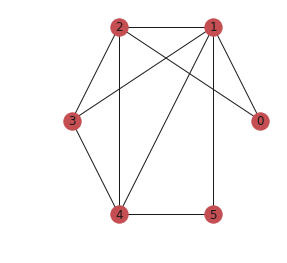

In [203]:
plt.figure(figsize=(3,3))
nx.draw_circular(induced,with_labels=True)

In [204]:
top_bet = measuring(red_tetra_sin_cofact).sort_values('Betweenness', ascending=False).head(20).index.values

In [205]:
top_bet

array(['143', '140', '142', '342', '340', '306', '145', '343', '341',
       '106', '159', '330', '359', '344', '109', '141', '328', '338',
       '301', '130'], dtype=object)

In [206]:
# a que comunidad pertenecen los de mayor betweness
for i in top_bet:
    print(i,part[i])

143 2
140 2
142 2
342 2
340 1
306 3
145 1
343 2
341 1
106 2
159 0
330 4
359 3
344 2
109 2
141 2
328 2
338 1
301 4
130 1


Text(0,0.5,'comunidad')

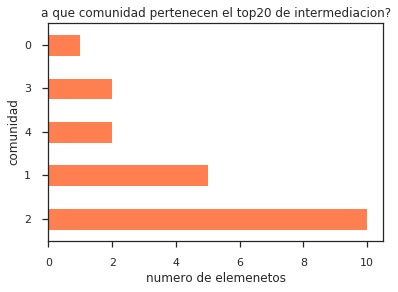

In [207]:
pd.DataFrame([(i,part[i]) for i in top_bet ]).set_index(0)[1].value_counts().plot.barh(
    title='a que comunidad pertenecen el top20 de intermediacion?', color='coral')
plt.xlabel('numero de elemenetos')
plt.ylabel('comunidad')

In [208]:
df_measuring.describe()

Authorities  Eigenvector    PageRank  Harmonic_Closeness   Closeness  \
count   352.000000   352.000000  352.000000          352.000000  352.000000   
mean      0.002841     0.038102    0.002841            0.300125    0.246275   
std       0.002783     0.037325    0.000586            0.040459    0.035382   
min       0.000035     0.000464    0.001531            0.201097    0.175940   
25%       0.000847     0.011363    0.002388            0.270444    0.218013   
50%       0.001972     0.026449    0.002857            0.297342    0.241154   
75%       0.003840     0.051508    0.003303            0.332564    0.270156   
max       0.014411     0.193277    0.004339            0.388068    0.341440   

             Hubs      Degree  Betweenness  
count  352.000000  352.000000   352.000000  
mean     0.002841    0.044953     0.008980  
std      0.002783    0.014054     0.011547  
min      0.000035    0.011396     0.000000  
25%      0.000847    0.034188     0.001178  
50%      0.001972    0.045584     0.003827  
75%      0.003840    0.056980     0.012757  
max      0.014411    0.082621     0.060460

In [209]:
df_measuring.loc[top_bet]

Authorities  Eigenvector  PageRank  Harmonic_Closeness  Closeness  \
143     0.007644     0.102518  0.003562            0.382102   0.331445   
140     0.003967     0.053201  0.003419            0.375521   0.326208   
142     0.005790     0.077652  0.003489            0.388068   0.341440   
342     0.005714     0.076637  0.003472            0.379214   0.330820   
340     0.005781     0.077536  0.003530            0.377273   0.327731   
306     0.002033     0.027266  0.002837            0.345028   0.296203   
145     0.007559     0.101379  0.003135            0.368466   0.315932   
343     0.004288     0.057504  0.002886            0.369602   0.325301   
341     0.007282     0.097666  0.003443            0.383475   0.332701   
106     0.003763     0.050474  0.002949            0.349953   0.298469   
159     0.003475     0.046600  0.003980            0.326542   0.261355   
330     0.005048     0.067703  0.004081            0.374858   0.303633   
359     0.001346     0.018049  0.004016            0.325216   0.260386   
344     0.003704     0.049673  0.002731            0.367377   0.322018   
109     0.003086     0.041390  0.002959            0.345170   0.296954   
141     0.004445     0.059615  0.003340            0.376989   0.326816   
328     0.003815     0.051166  0.003162            0.366193   0.312278   
338     0.003543     0.047522  0.002719            0.351610   0.308165   
301     0.005445     0.073028  0.004339            0.372727   0.296453   
130     0.012620     0.169253  0.004017            0.377320   0.307625   

         Hubs    Degree  Betweenness  
143  0.007644  0.065527     0.060460  
140  0.003967  0.059829     0.056869  
142  0.005790  0.062678     0.054672  
342  0.005714  0.062678     0.050178  
340  0.005781  0.062678     0.049742  
306  0.002033  0.045584     0.046592  
145  0.007559  0.056980     0.046520  
343  0.004288  0.051282     0.045681  
341  0.007282  0.062678     0.044567  
106  0.003763  0.048433     0.043868  
159  0.003475  0.062678     0.040912  
330  0.005048  0.076923     0.040132  
359  0.001346  0.062678     0.039463  
344  0.003704  0.048433     0.039197  
109  0.003086  0.045584     0.038618  
141  0.004445  0.059829     0.036758  
328  0.003815  0.056980     0.036415  
338  0.003543  0.045584     0.035128  
301  0.005445  0.082621     0.035074  
130  0.012620  0.076923     0.034117

Text(0,0.5,'Comunidad')

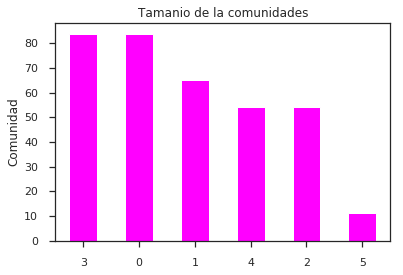

In [210]:
pd.Series(part).value_counts().plot.bar(rot=0, title='Tamanio de la comunidades', color='magenta')
plt.ylabel('Numero de nodos')
plt.ylabel('Comunidad')

------

# Generar redes de contacto con cross-correlation

In [213]:
matrix_adyacente_dimer_con_cofat = nx.to_numpy_matrix(red_dimer_con_cofact)
matrix_adyacente_dimer_sin_cofat = nx.to_numpy_matrix(red_dimer_sin_cofact)
matrix_adyacente_tetra_con_cofat = nx.to_numpy_matrix(red_tetra_con_cofact)
matrix_adyacente_tetra_sin_cofat = nx.to_numpy_matrix(red_tetra_sin_cofact)

In [261]:
matrix_adyacente_dimer_con_cofat

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [214]:
# matrix_adyacente_tetra_con_cofat.shape
# matrix_adyacente_tetra_sin_cofat.shape

In [245]:
def get_matrix_correlation(path, matriz_adyacente):
    """de datos de correlacion cruzada obtenemos la matriz de adyacencia de correlacion"""
    #lectura de datos
    data = pd.DataFrame([i.split("\n")[0].split() for i in open(path).readlines()],columns=[
    'res_1','res_2','correlation'])
    
    # generar matriz
    df = pd.pivot(
    data.res_1.astype(int).values,
    data.res_2.astype(int).values,
    data.correlation.astype(float).values).fillna(0)
    
    def func2(A):
        """De matriz triangular a matriz completa
        A: numpy.array
        out: numpy.array"""
        out = A.T + A
        idx = np.arange(A.shape[0])
        out[idx,idx] = A[idx,idx]
        return out
    
    
    values_complete = func2(np.triu(df.values))
    
    df_complete = pd.DataFrame(values_complete)
    
    mat_corr = df_complete.values
    
    print('matriz de correlacion',mat_corr.shape)
    print('matriz de contacto',matriz_adyacente.shape)
    print('=='*40)
    
    pre_mat = np.multiply(mat_corr, matriz_adyacente)
    
    for i in range(df_complete.shape[0]):
        for j in range(df_complete.shape[0]):
        # cambio condicional
            if pre_mat[i,j] == 0 and abs(mat_corr[i,j]) > 0.60:
                pre_mat[i,j] = mat_corr[i,j]
        # quito selfloops
            if i == j:
                pre_mat[i,j] = 0
            
    return df, df_complete, pre_mat

In [246]:
tri_dimer_con,complete_dimer_con, matrix_corr_dimer_con = get_matrix_correlation(
    'networks_scripts/ddc_dimer_con.txt', matrix_adyacente_dimer_con_cofat)
tri_dimer_sin,complete_dimer_sin, matrix_corr_dimer_sin = get_matrix_correlation(
    'networks_scripts/dcc_dimer_sin.txt', matrix_adyacente_dimer_sin_cofat)

tri_tetra_con,complete_tetra_con, matrix_corr_tetra_con = get_matrix_correlation(
    'networks_scripts/dcc_tetra_con.txt', matrix_adyacente_tetra_con_cofat)
tri_tetra_sin,complete_tetra_sin, matrix_corr_tetra_sin = get_matrix_correlation(
    'networks_scripts/dcc_tetra_sin.txt', matrix_adyacente_tetra_sin_cofat)

matriz de correlacion (352, 352)
matriz de contacto (352, 352)
matriz de correlacion (352, 352)
matriz de contacto (352, 352)
matriz de correlacion (352, 352)
matriz de contacto (352, 352)
matriz de correlacion (352, 352)
matriz de contacto (352, 352)


In [247]:
plt.style.use('seaborn-poster')

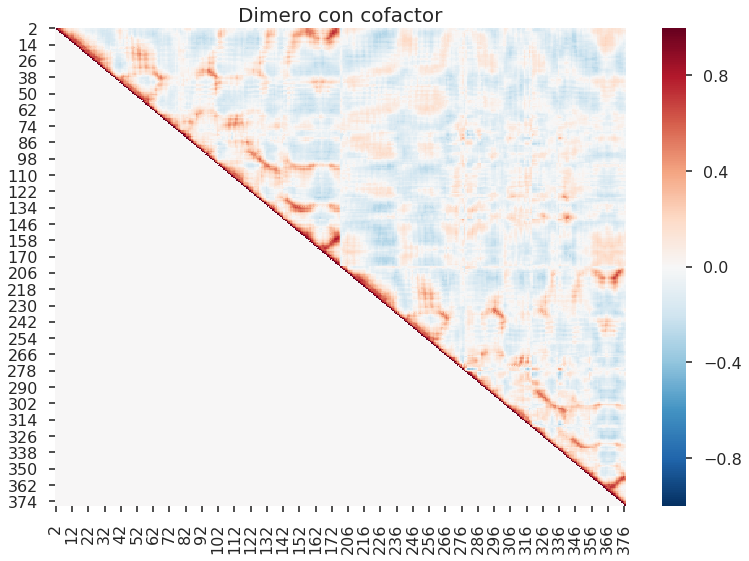

In [248]:
fig, ax = plt.subplots()

sns.heatmap(tri_dimer_con, cmap='RdBu_r', vmin=-1, vmax=1)

plt.title('Dimero con cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels)
plt.savefig('cross_correlation_dimer_con_cofact.jpg');

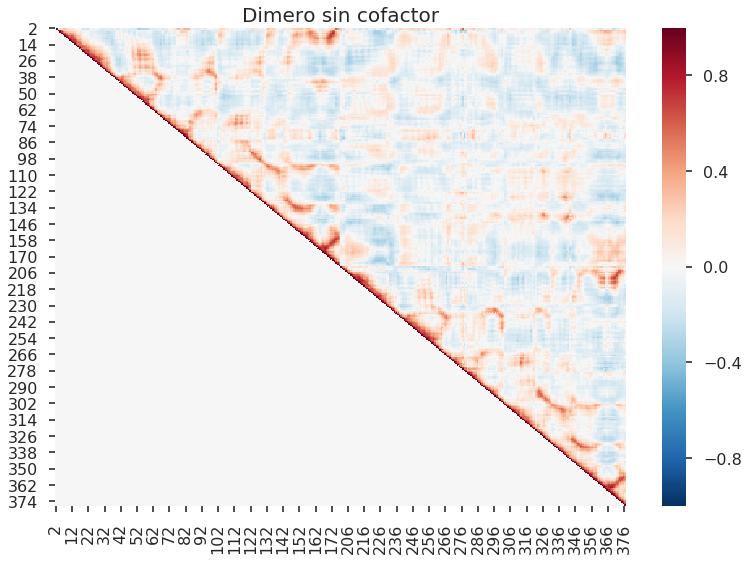

In [249]:
fig, ax = plt.subplots()

sns.heatmap(tri_dimer_sin, cmap='RdBu_r', vmin=-1, vmax=1)

plt.title('Dimero sin cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels)
plt.savefig('cross_correlation_dimer_sin_cofact.jpg');

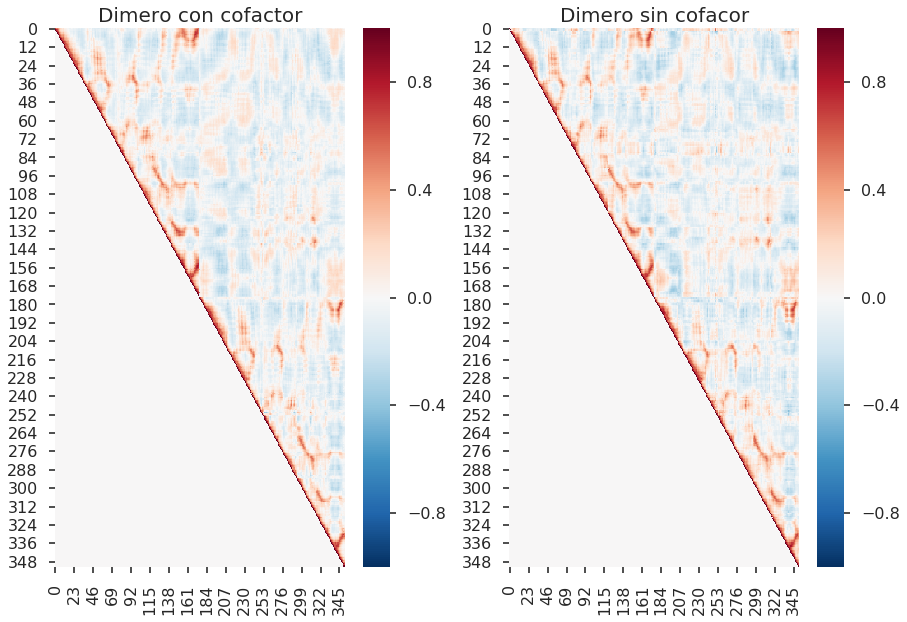

In [250]:
plt.subplot(1,2,1)
sns.heatmap(tri_dimer_con, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Dimero con cofactor', fontsize=20)

plt.subplot(1,2,2)
sns.heatmap(tri_dimer_sin, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Dimero sin cofacor', fontsize=20)

plt.tight_layout()

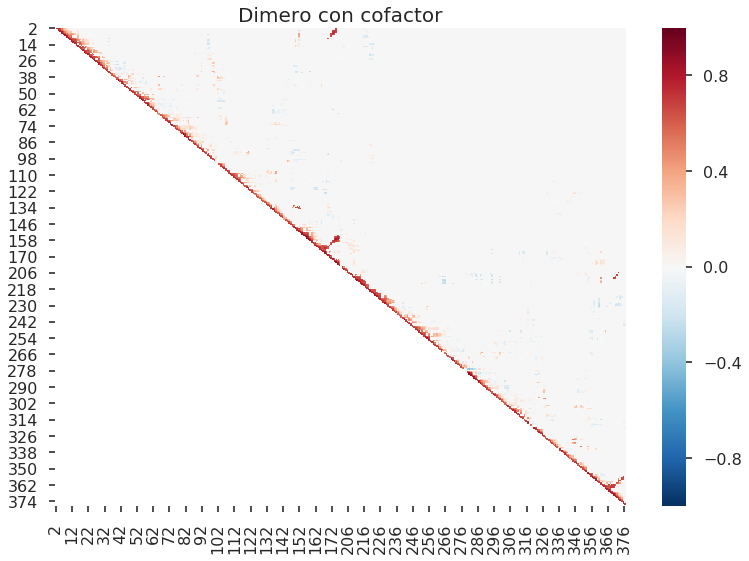

In [251]:
mask = np.zeros_like(matrix_corr_dimer_con)
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(matrix_corr_dimer_con, cmap='RdBu_r', vmin=-1, vmax=1, mask=mask)

plt.title('Dimero con cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels);
plt.savefig('alosteric_edges_dimer_con_cofact.jpg');

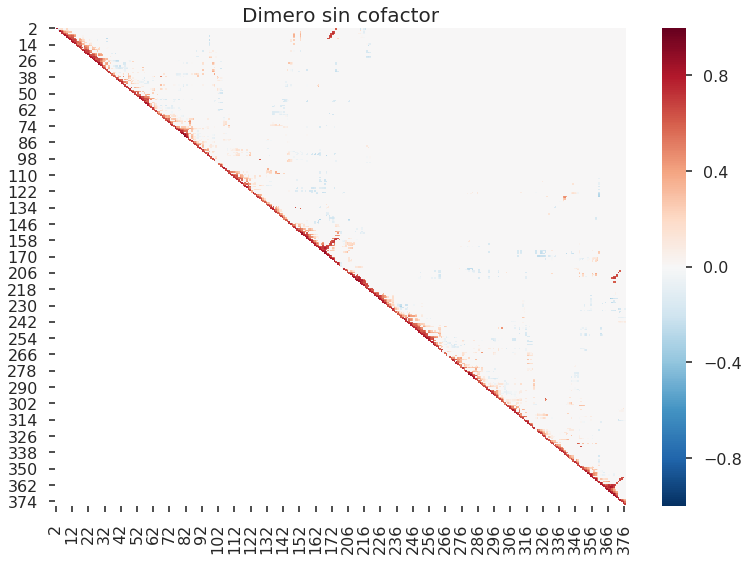

In [252]:
mask = np.zeros_like(matrix_corr_dimer_sin)
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(matrix_corr_dimer_sin, cmap='RdBu_r', vmin=-1, vmax=1, mask=mask)

plt.title('Dimero sin cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels);
plt.savefig('alosteric_edges_dimer_sin_cofact.jpg');

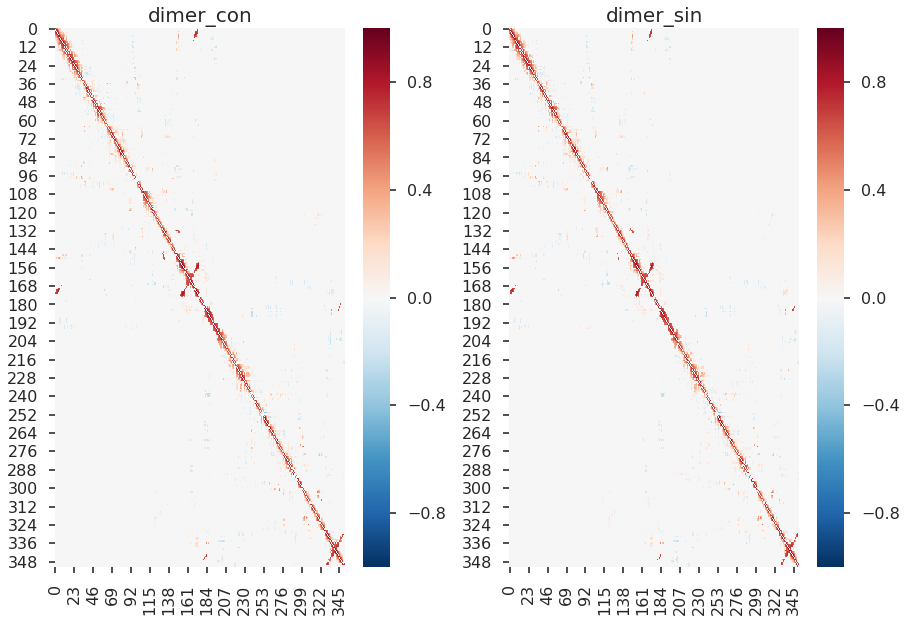

In [253]:
plt.subplot(1,2,1)
sns.heatmap(matrix_corr_dimer_con, cmap='RdBu_r'
            , vmin=-1, vmax=1
           )
plt.title('dimer_con', fontsize=20)

plt.subplot(1,2,2)
sns.heatmap(matrix_corr_dimer_con, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('dimer_sin', fontsize=20)

plt.tight_layout()

Dimero con vs Dimero sin 

No hay cambios abruptos en la correlación, solo observamos que algunas correlaciones se atenuan con cofactor, que sin el.

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 3050
Average degree:  17.3295
densidad: 0.04937
Clustering Promedio: 0.50720
Promedio de camino mas corto 3.55541
Transitividad: 0.47435
Diametro: 8
Radio: 5
Centro de la red [1, 2, 5, 6, 7, 14, 111, 113, 114, 119, 120, 121, 138, 141, 142, 143, 144, 145, 146, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 178, 179, 180, 183, 184, 185, 186, 187, 188, 190, 191, 288, 289, 292, 306, 307, 308, 309, 310, 311, 328, 329, 331, 333, 336, 338]
Grado promedio: 17.3295


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
162     0.008686     0.072920            0.398059   0.348907  0.008686   
184     0.007353     0.094608            0.411080   0.363354  0.007353   
164     0.008155     0.082687            0.400047   0.356707  0.008155   
188     0.001931     0.069694            0.385322   0.335564  0.001931   
172     0.044761     0.083576            0.420265   0.367925  0.044761   
168     0.006823     0.045648            0.398816   0.347525  0.006823   
174     0.032543     0.099371            0.418513   0.364865  0.032543   
328     0.000220     0.099862            0.412737   0.359263  0.000220   
144     0.000604     0.071497            0.379451   0.329887  0.000604   
187     0.002597     0.084725            0.402604   0.356345  0.002597   
132     0.005716     0.034848            0.377888   0.321429  0.005716   
171     0.033010     0.065602            0.397254   0.345472  0.033010   
173     0.038103     0.072273            0.403646   0.354545  0.038103   
196    -0.001266     0.010977            0.323911   0.281928 -0.001266   
43     -0.000495     0.072173            0.375521   0.318512 -0.000495   
289    -0.000756     0.076051            0.377936   0.322610 -0.000756   
292    -0.000822     0.081333            0.388731   0.333968 -0.000822   
331     0.001905     0.067554            0.389062   0.331758  0.001905   
160     0.014675     0.082880            0.405208   0.355263  0.014675   
186     0.003017     0.080329            0.396686   0.352056  0.003017   

       Degree  Betweenness  
162  0.065527     0.046285  
184  0.071225     0.046058  
164  0.056980     0.041063  
188  0.056980     0.040780  
172  0.076923     0.039773  
168  0.059829     0.035969  
174  0.079772     0.032397  
328  0.071225     0.030577  
144  0.054131     0.029380  
187  0.059829     0.027402  
132  0.056980     0.026378  
171  0.065527     0.026292  
173  0.065527     0.025258  
196  0.039886     0.023763  
43   0.062678     0.023717  
289  0.062678     0.023574  
292  0.062678     0.022321  
331  0.068376     0.022022  
160  0.068376     0.020243  
186  0.056980     0.019287

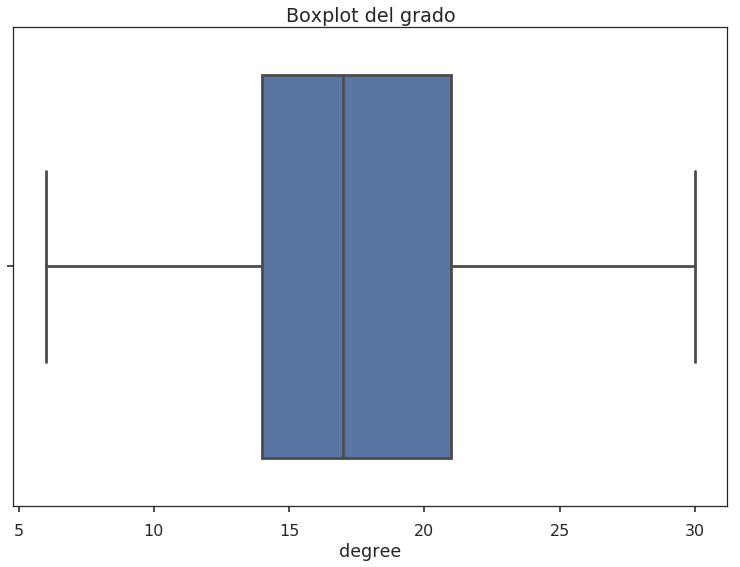

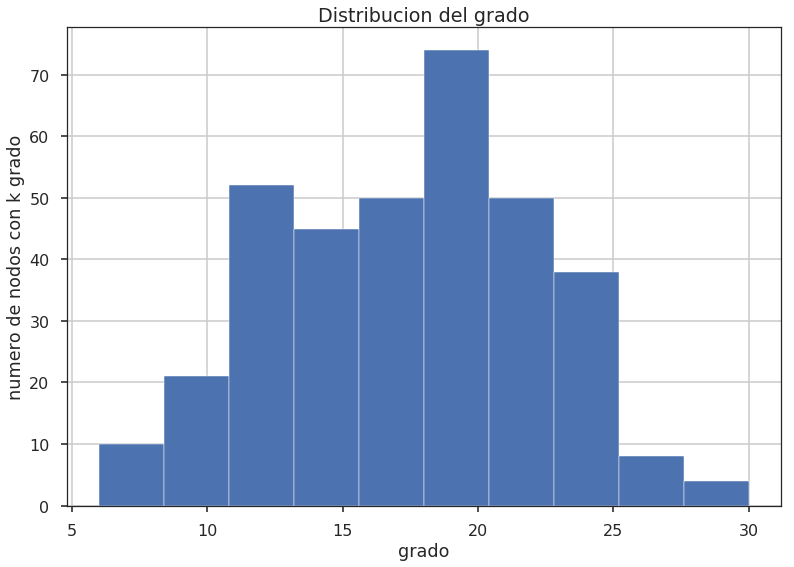

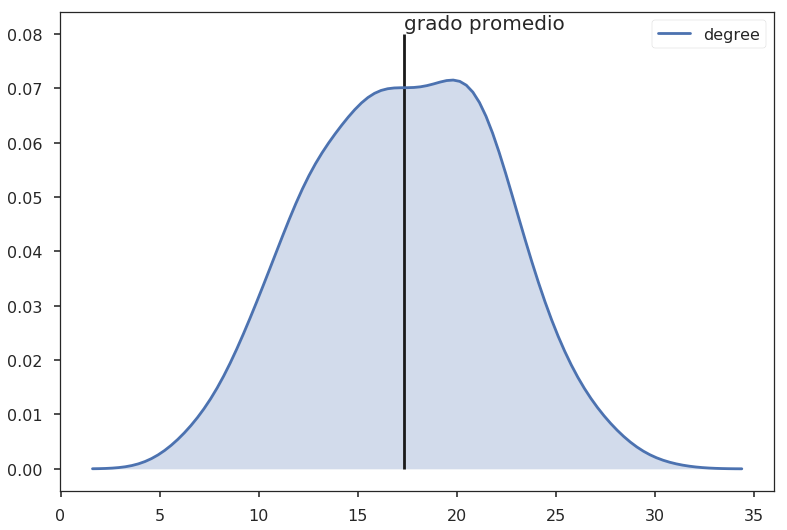

In [254]:
network_result(nx.from_numpy_matrix(matrix_corr_dimer_con))

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 3082
Average degree:  17.5114
densidad: 0.04989
Clustering Promedio: 0.50857
Promedio de camino mas corto 3.47235
Transitividad: 0.46985
Diametro: 7
Radio: 4
Centro de la red [157, 158, 159, 160, 162, 164, 166, 170, 182, 331, 333]
Grado promedio: 17.5114


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
162     0.024308     0.102340            0.428504   0.381522  0.024308   
54     -0.001807     0.079176            0.392187   0.338476 -0.001807   
161     0.023768     0.084304            0.410606   0.361856  0.023768   
184     0.010640     0.070482            0.402462   0.346496  0.010640   
168     0.021478     0.058618            0.410369   0.362229  0.021478   
171     0.028030     0.096366            0.431771   0.381107  0.028030   
335     0.005946     0.040181            0.388731   0.335885  0.005946   
183     0.012231     0.085467            0.415578   0.365245  0.012231   
170     0.031582     0.082739            0.419508   0.369863  0.031582   
169     0.025330     0.067869            0.413352   0.365625  0.025330   
172     0.028242     0.100938            0.428930   0.378641  0.028242   
324     0.000734     0.081199            0.398580   0.341440  0.000734   
155     0.020265     0.101940            0.414441   0.360000  0.020265   
181     0.010169     0.086886            0.408475   0.365625  0.010169   
182     0.010603     0.075980            0.401989   0.360740  0.010603   
97      0.000639     0.075182            0.381155   0.315647  0.000639   
250     0.000122     0.049428            0.355540   0.303633  0.000122   
42      0.000090     0.109819            0.396875   0.333968  0.000090   
167     0.019363     0.053613            0.398627   0.353119  0.019363   
331     0.005452     0.069005            0.401989   0.354545  0.005452   

       Degree  Betweenness  
162  0.071225     0.054425  
54   0.065527     0.050665  
161  0.071225     0.049120  
184  0.065527     0.047130  
168  0.068376     0.042725  
171  0.079772     0.040799  
335  0.062678     0.037891  
183  0.068376     0.037299  
170  0.074074     0.034310  
169  0.065527     0.031176  
172  0.076923     0.029484  
324  0.068376     0.028086  
155  0.076923     0.027876  
181  0.059829     0.027421  
182  0.054131     0.026347  
97   0.068376     0.025416  
250  0.059829     0.024531  
42   0.076923     0.023505  
167  0.054131     0.022041  
331  0.062678     0.021947

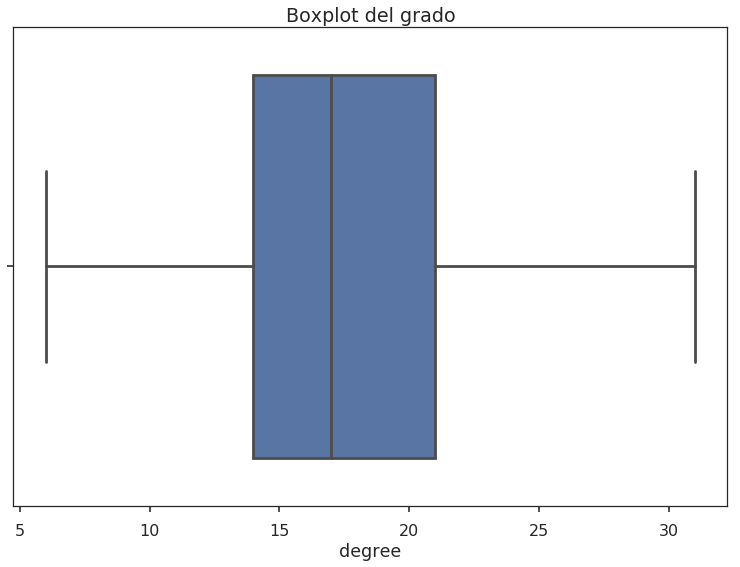

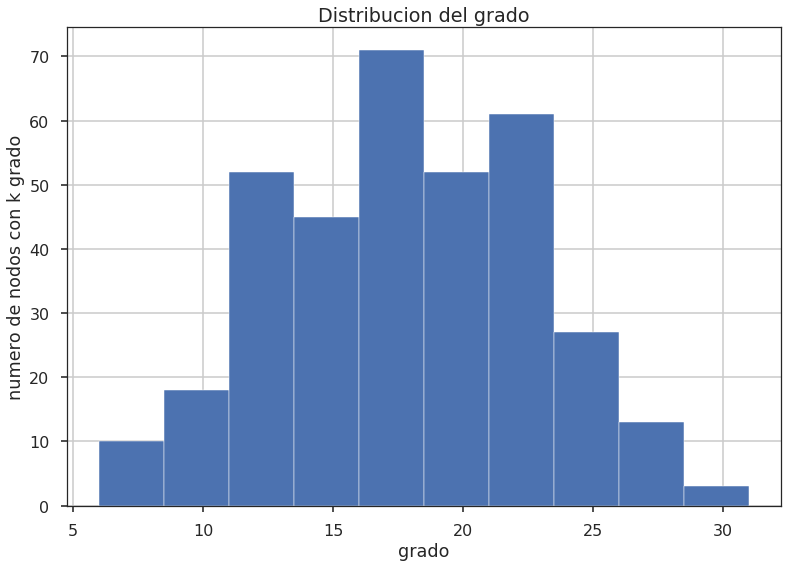

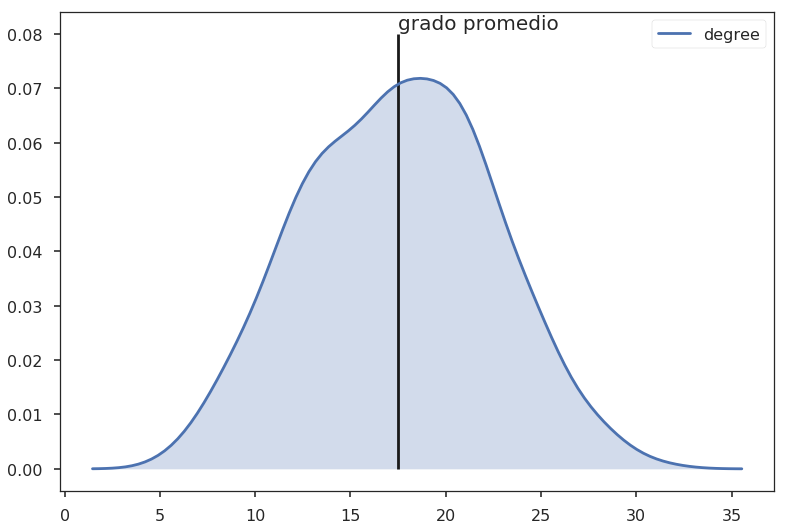

In [255]:
network_result(nx.from_numpy_matrix(matrix_corr_dimer_sin))

# Correcion Tetramero

In [269]:
file1 = '/home/serch/Escritorio/Tesis/kepler/Network_correlation/tetra_clean.pdb'

pdb1 = rpt.PdbStruct(file1)

pdb1 = rpt.PdbStruct(file1)

pdb1.AddPdbData("%s" % file1)

pdb1.PrintPdbInfo()

parejas_resi_resx = [[i.resx, i.resi] for i in pdb1.GetResChain()]

parejas_resi_resx = dict(parejas_resi_resx)

Number of residues and frame: 352    None
Number of chains:             1  dict_keys(['A'])


# Tetra correlation network

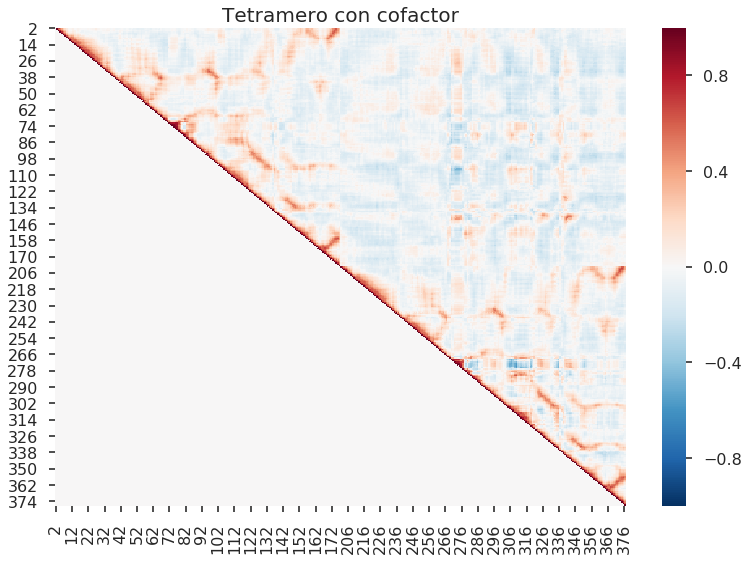

In [270]:
fig, ax = plt.subplots()

sns.heatmap(tri_tetra_con, cmap='RdBu_r', vmin=-1, vmax=1)

plt.title('Tetramero con cofactor', fontsize=20)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels)
plt.savefig('cross_correlation_tetra_con_cofact.jpg');

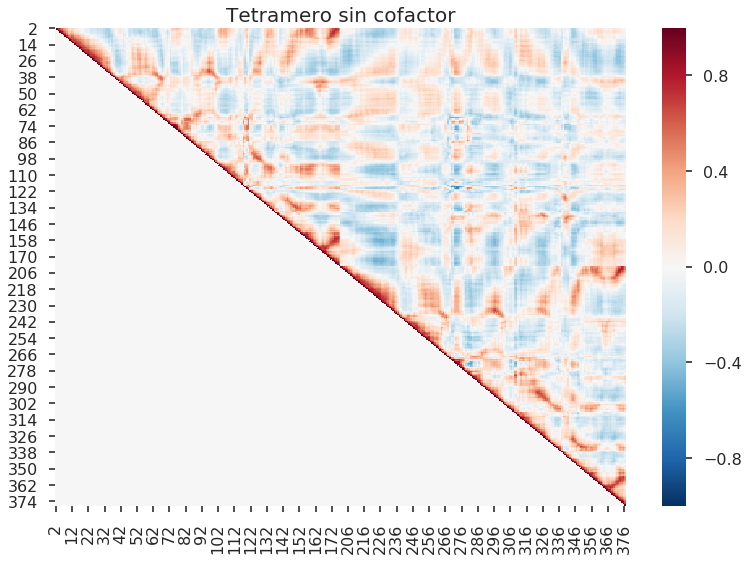

In [271]:
fig, ax = plt.subplots()

sns.heatmap(tri_tetra_sin, cmap='RdBu_r', vmin=-1, vmax=1)

plt.title('Tetramero sin cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels)
plt.savefig('cross_correlation_tetra_sin_cofact.jpg');

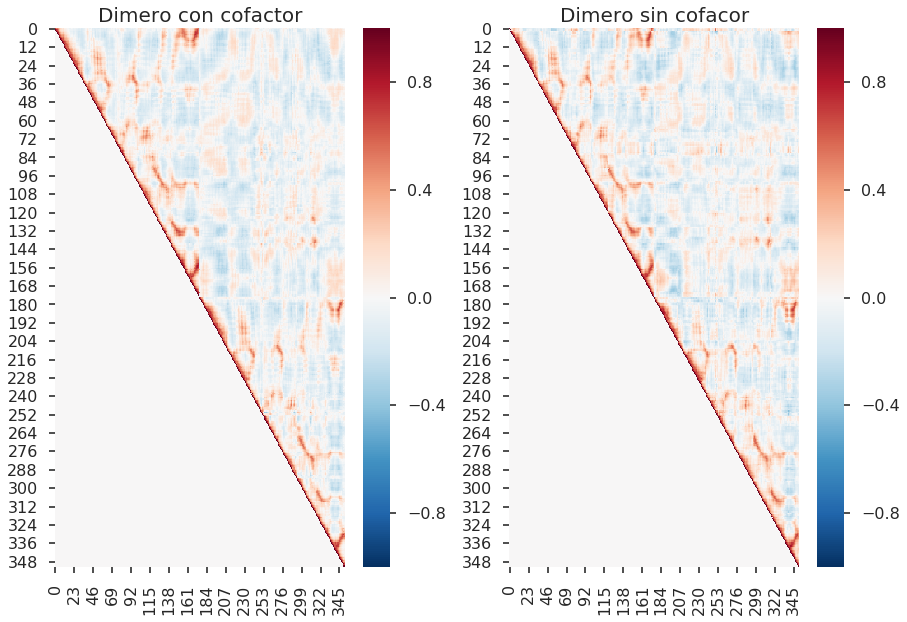

In [250]:
plt.subplot(1,2,1)
sns.heatmap(tri_dimer_con, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Dimero con cofactor', fontsize=20)

plt.subplot(1,2,2)
sns.heatmap(tri_dimer_sin, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Dimero sin cofacor', fontsize=20)

plt.tight_layout()

In [274]:
matrix_corr_tetra_con

matrix([[ 0.   ,  0.769,  0.47 , ...,  0.   ,  0.   , -0.   ],
        [ 0.769,  0.   ,  0.674, ..., -0.   , -0.   , -0.   ],
        [ 0.47 ,  0.674,  0.   , ..., -0.   , -0.   , -0.   ],
        ...,
        [ 0.   , -0.   , -0.   , ...,  0.   ,  0.743,  0.497],
        [ 0.   , -0.   , -0.   , ...,  0.743,  0.   ,  0.651],
        [-0.   , -0.   , -0.   , ...,  0.497,  0.651,  0.   ]])

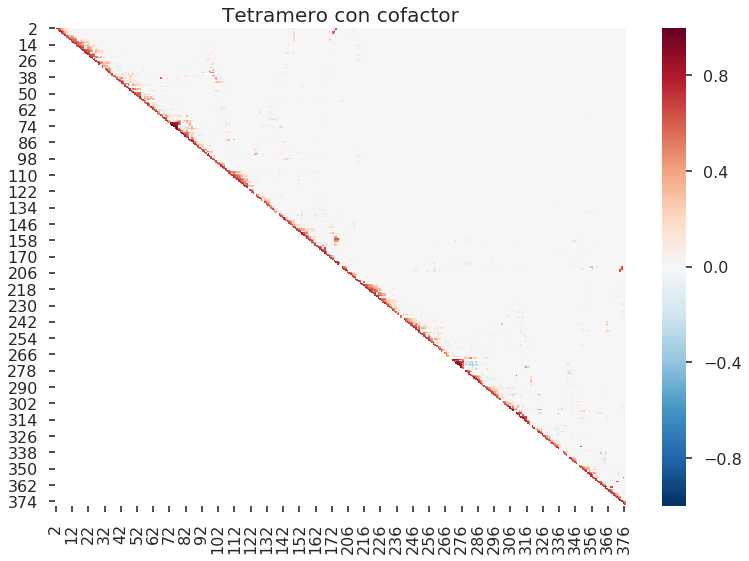

In [275]:
mask = np.zeros_like(matrix_corr_tetra_con)
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(matrix_corr_tetra_con, cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            mask=mask)

plt.title('Tetramero con cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels);
plt.savefig('alosteric_edges_tetramero_con_cofact.jpg');

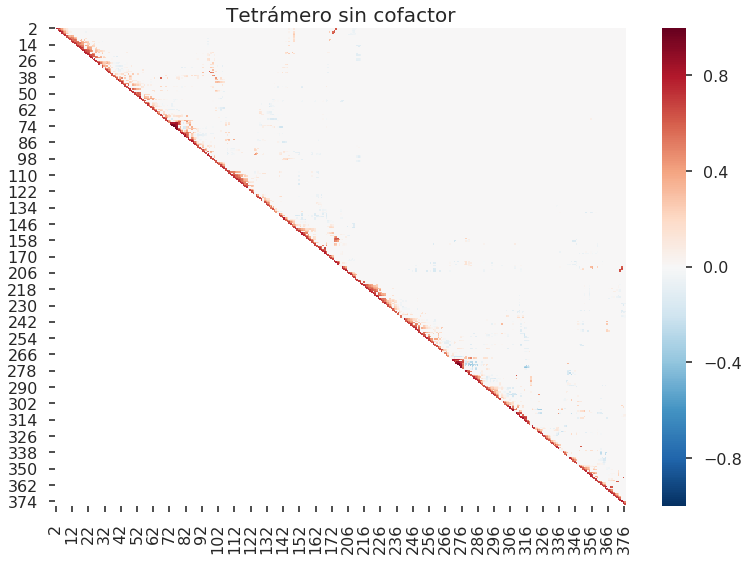

In [276]:
mask = np.zeros_like(matrix_corr_tetra_sin)
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(matrix_corr_tetra_con, cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            mask=mask)

plt.title('Tetrámero sin cofactor', fontsize=20)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_xticklabels(new_labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
new_labels = [parejas_resi_resx.get(int(i)) for i in labels]
ax.set_yticklabels(new_labels);
plt.savefig('alosteric_edges_tetramero_sin_cofact.jpg');

Dimero con vs Dimero sin 

No hay cambios abruptos en la correlación, solo observamos que algunas correlaciones se atenuan con cofactor, que sin el.

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 2973
Average degree:  16.8920
densidad: 0.04813
Clustering Promedio: 0.53410
Promedio de camino mas corto 3.66565
Transitividad: 0.48463
Diametro: 8
Radio: 4
Centro de la red [160, 165, 167, 176]
Grado promedio: 16.8920


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
177     0.000023     0.073419            0.415152   0.368697  0.000023   
172     0.001624     0.048740            0.393655   0.338803  0.001624   
176     0.000005     0.082388            0.417377   0.371036  0.000005   
179     0.000003     0.055377            0.399621   0.346838  0.000003   
54      0.000336     0.094732            0.388305   0.340446  0.000336   
160     0.000256     0.088175            0.415483   0.369474  0.000256   
158     0.000275     0.060326            0.380729   0.337825  0.000275   
334    -0.000006     0.034445            0.387216   0.339458 -0.000006   
173     0.000925     0.058853            0.399432   0.345133  0.000925   
152     0.000304     0.097173            0.401326   0.355263  0.000304   
161     0.000040     0.045297            0.367282   0.326208  0.000040   
106    -0.000606     0.070930            0.363778   0.305749 -0.000606   
159     0.000413     0.069534            0.407623   0.361483  0.000413   
287     0.000028     0.062916            0.400237   0.331445  0.000028   
167     0.000040     0.096068            0.402225   0.355984  0.000040   
190    -0.001004     0.006328            0.325237   0.287705 -0.001004   
187    -0.005657     0.019066            0.324337   0.281476 -0.005657   
349     0.000017     0.019405            0.355919   0.313113  0.000017   
165     0.000015     0.073087            0.396544   0.348560  0.000015   
166     0.000015     0.049171            0.378125   0.334924  0.000015   

       Degree  Betweenness  
177  0.065527     0.062696  
172  0.068376     0.060560  
176  0.071225     0.058524  
179  0.062678     0.048894  
54   0.056980     0.047408  
160  0.071225     0.043253  
158  0.051282     0.035073  
334  0.054131     0.034972  
173  0.065527     0.033283  
152  0.065527     0.031460  
161  0.045584     0.031436  
106  0.071225     0.030225  
159  0.065527     0.029413  
287  0.082621     0.028603  
167  0.062678     0.028449  
190  0.039886     0.028384  
187  0.034188     0.027528  
349  0.042735     0.027457  
165  0.065527     0.027375  
166  0.054131     0.027336

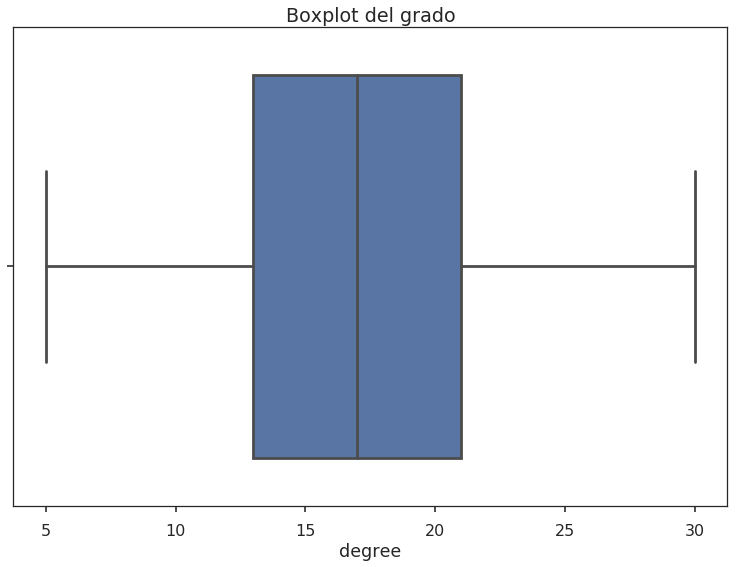

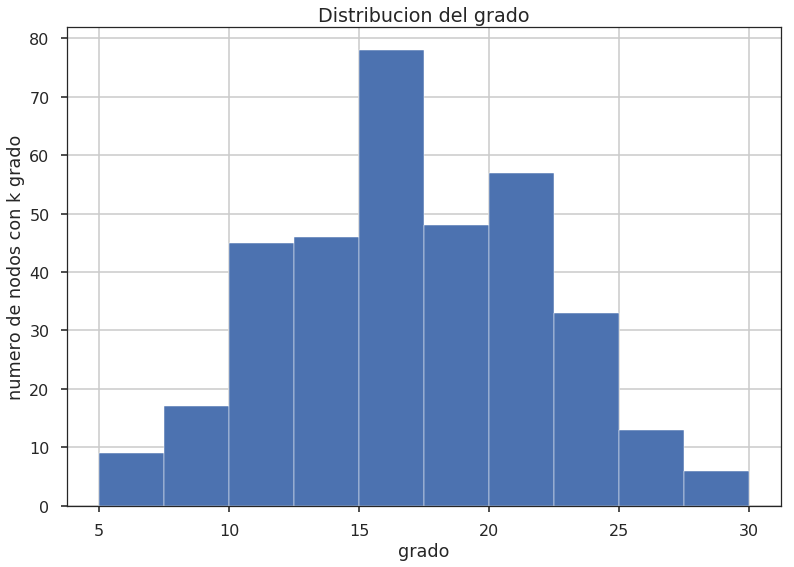

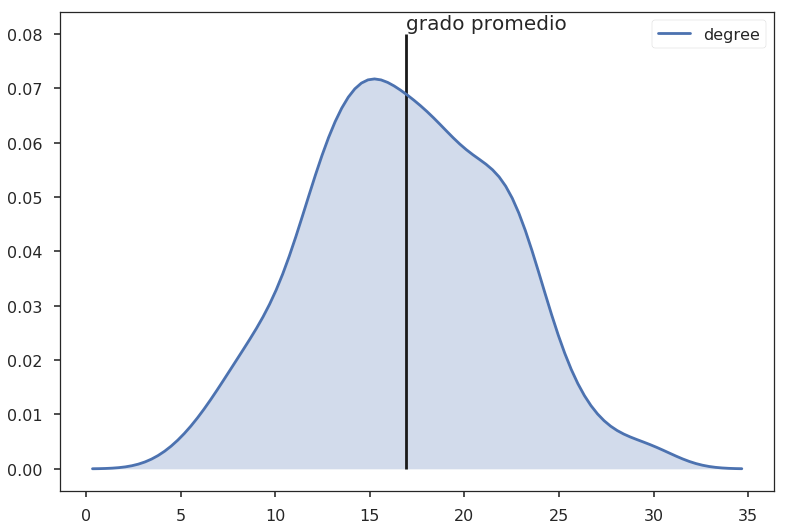

In [277]:
network_result(nx.from_numpy_matrix(matrix_corr_tetra_con))

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 3134
Average degree:  17.8068
densidad: 0.05073
Clustering Promedio: 0.50276
Promedio de camino mas corto 3.43910
Transitividad: 0.46283
Diametro: 7
Radio: 4
Centro de la red [152, 153, 160, 165, 166]
Grado promedio: 17.8068


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
176     0.006564     0.088249            0.411080   0.365625  0.006564   
152     0.023224     0.111120            0.416903   0.367925  0.023224   
173     0.045111     0.089849            0.419839   0.362978  0.045111   
172     0.051024     0.082296            0.420170   0.367155  0.051024   
132     0.003262     0.032880            0.370644   0.328960  0.003262   
53     -0.001653     0.092705            0.391430   0.340116 -0.001653   
303    -0.000465     0.014566            0.358854   0.318223 -0.000465   
166     0.007447     0.101126            0.415720   0.366388  0.007447   
171     0.047603     0.064234            0.399621   0.346838  0.047603   
177     0.007845     0.078563            0.411411   0.365245  0.007845   
117     0.001574     0.014180            0.335275   0.292744  0.001574   
230    -0.002741     0.101590            0.412926   0.344455 -0.002741   
160     0.022225     0.095454            0.423059   0.376609  0.022225   
178     0.006419     0.075375            0.416146   0.367155  0.006419   
179     0.006055     0.066863            0.407528   0.355263  0.006055   
158     0.028003     0.064411            0.396544   0.348907  0.028003   
335     0.004249     0.049128            0.390956   0.345813  0.004249   
165     0.006191     0.087111            0.406487   0.357070  0.006191   
148     0.014700     0.060101            0.385275   0.327425  0.014700   
95      0.000849     0.093936            0.391714   0.328037  0.000849   

       Degree  Betweenness  
176  0.068376     0.044048  
152  0.076923     0.039496  
173  0.079772     0.039295  
172  0.079772     0.037991  
132  0.042735     0.035032  
53   0.062678     0.034689  
303  0.042735     0.033544  
166  0.074074     0.032988  
171  0.074074     0.031133  
177  0.062678     0.030468  
117  0.039886     0.027649  
230  0.085470     0.027022  
160  0.074074     0.027018  
178  0.062678     0.025902  
179  0.062678     0.024255  
158  0.059829     0.024032  
335  0.054131     0.023772  
165  0.074074     0.022965  
148  0.071225     0.022128  
95   0.071225     0.022108

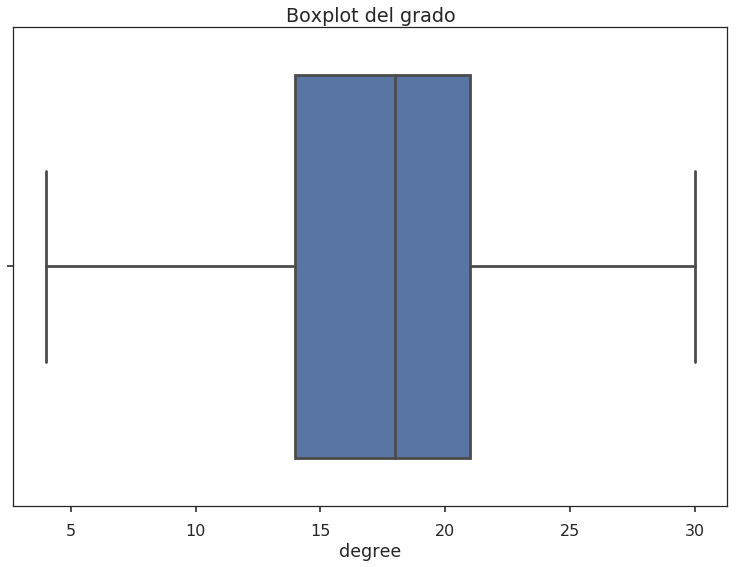

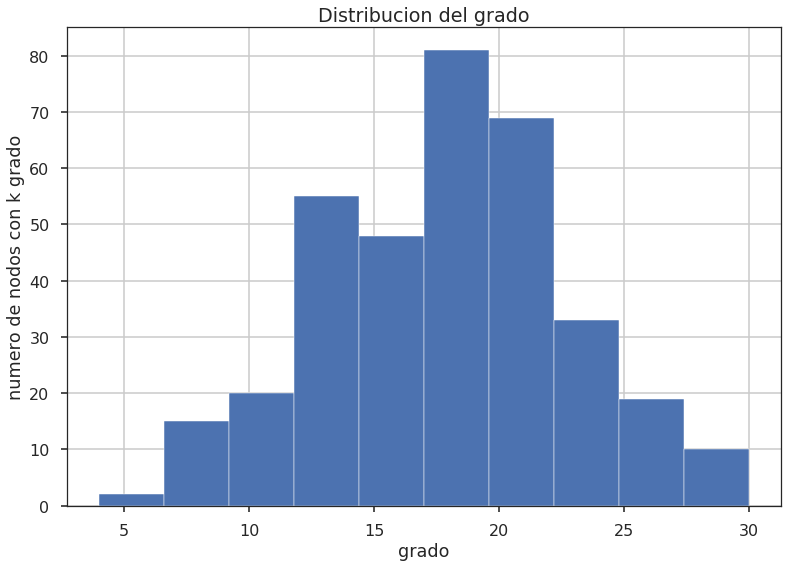

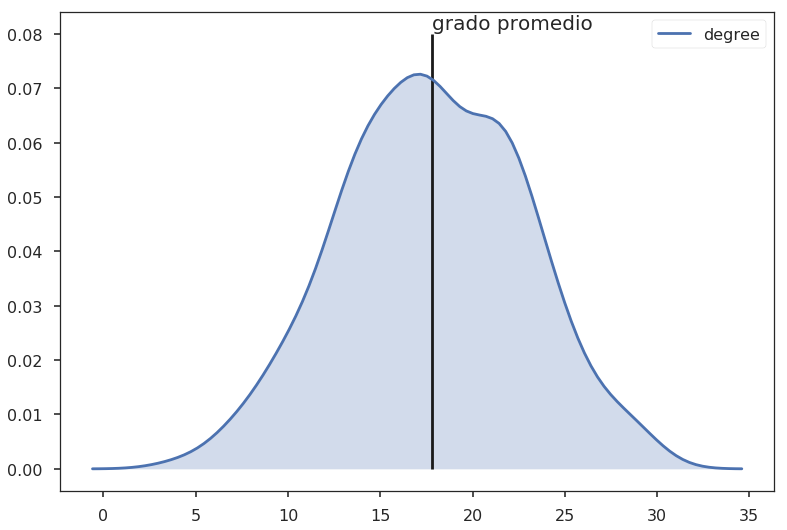

In [278]:
network_result(nx.from_numpy_matrix(matrix_corr_tetra_sin))

----------

# Funcion de resultados del analisis

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import seaborn as sns

def network_result(red):
    print('Info:',nx.info(red))
    # densidad, porcentaje de enlaces de todos los posibles que puede haber. #Densidad baja#
    print('densidad: %1.5f' %nx.density(red))
    # clustering promedio
    print('Clustering Promedio: %1.5f' %nx.average_clustering(red))
    # promedio de camnino mas corto
    print('Promedio de camino mas corto %1.5f' %nx.average_shortest_path_length(red))
    # porcentaje de triangulos existentes de todos los posibles tringulos posibles
    print('Transitividad: %1.5f' %nx.transitivity(red))
    # el camino mas largo entre todos los caminos posibles sobre cada par de nodos
    print('Diametro: %i' %nx.diameter(red))
    # el camino mas corto sobre todos los caminos mas largos de los caminos posibles de cada par de nodos
    print('Radio: %i' %nx.radius(red))

    # excentricidad es la maxima distancia de un nodo a todos los demas en la red
    # nodos con una excentricidad igual al radio
    print('Centro de la red %s' %nx.center(red))
    
    df = pd.DataFrame([i for i in red.degree], columns=['node_id','degree'])
    # grado promedio
    print('Grado promedio: %1.4f' %df.degree.mean())
    plt.subplots()
    sns.boxplot(data=df,x='degree')
    plt.title('Boxplot del grado')
    
    plt.subplots()
    df.degree.hist()
    plt.title('Distribucion del grado')
    plt.ylabel('numero de nodos con k grado')
    plt.xlabel('grado')
    
    plt.subplots()
    sns.kdeplot(df.degree, shade=True)
    plt.vlines(df.degree.mean(),0,0.08)
    plt.text(df.degree.mean(),0.081,'grado promedio',fontsize=20)
    
    # No jala! con eigenvector ni con hits
    def measuring(red):
        dgr = nx.degree_centrality(red)
        clo = nx.closeness_centrality(red)
        har = nx.harmonic_centrality(red)
        eig = nx.eigenvector_centrality_numpy(red)
        bet = nx.betweenness_centrality(red)
#         pgr = nx.pagerank(red)
        hits = nx.hits_numpy(red)

        centralities = pd.concat(
        [pd.Series(c) for c in (
            hits[1],
            eig,
#             pgr,
            har,
            clo,
            hits[0],
            dgr,
            bet
                               )],
        axis=1)
        centralities.columns = ["Authorities","Eigenvector", 
#                                 "PageRank",
                               "Harmonic_Closeness", 
                                "Closeness",
                                "Hubs",
                               "Degree", 
                                "Betweenness"]
        centralities["Harmonic_Closeness"] /= centralities.shape[0]

        return centralities
    
    df_measuring = measuring(red)
    return df_measuring.sort_values('Betweenness', ascending=False).head(20)

Residuos de interes son del 60 al 90 y del 100 al 108 que es donde esta el cofactor

In [231]:
G = nx.from_numpy_matrix(matrix_corr_dimer_sin)
H = nx.from_numpy_matrix(matrix_corr_dimer_con)

In [232]:
pd.Series(nx.betweenness_centrality(G)).sort_values(ascending=False).head(10)

162    0.054425
54     0.050665
161    0.049120
184    0.047130
168    0.042725
171    0.040799
335    0.037891
183    0.037299
170    0.034310
169    0.031176
dtype: float64

In [233]:
pd.Series(nx.betweenness_centrality(H)).sort_values(ascending=False).head(10)

162    0.046285
184    0.046058
164    0.041063
188    0.040780
172    0.039773
168    0.035969
174    0.032397
328    0.030577
144    0.029380
187    0.027402
dtype: float64

# Correccion de parejas ya que estan con resx en lugar de resi en DIMEROS

In [234]:
file1 = '/home/serch/Escritorio/Tesis/kepler/Network_correlation/dimer_clean.pdb'

pdb1 = rpt.PdbStruct(file1)

pdb1 = rpt.PdbStruct(file1)

pdb1.AddPdbData("%s" % file1)

pdb1.PrintPdbInfo()

parejas_resi_resx = [[i.resx, i.resi] for i in pdb1.GetResChain()]

parejas_resi_resx = dict(parejas_resi_resx)

Number of residues and frame: 352    None
Number of chains:             1  dict_keys(['A'])


In [235]:
g_nodes = list(G.nodes())
h_nodes = list(H.nodes())

In [236]:
g_resi_nodes = [parejas_resi_resx.get(i) for i in g_nodes]
h_resi_nodes = [parejas_resi_resx.get(i) for i in h_nodes]

In [237]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [238]:
G = nx.relabel_nodes(G,parejas_resi_resx)

In [239]:
H = nx.relabel_nodes(H,parejas_resi_resx)

In [240]:
G.nodes()

NodeView((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 2

In [241]:
pd.Series(nx.betweenness_centrality(G)).sort_values(ascending=False).head(10)

164    0.054425
56     0.050665
163    0.049120
210    0.047130
170    0.042725
173    0.040799
361    0.037891
209    0.037299
172    0.034310
171    0.031176
dtype: float64

In [242]:
pd.Series(nx.betweenness_centrality(H)).sort_values(ascending=False).head(10)

164    0.046285
210    0.046058
166    0.041063
214    0.040780
174    0.039773
170    0.035969
176    0.032397
354    0.030577
146    0.029380
213    0.027402
dtype: float64

In [243]:
pat = list(nx.all_pairs_dijkstra_path(G,10,1))
for i in pat:
    for k in np.arange(100,109):
        if i[0] == k:
            for j in np.arange(131,143):
                print(i[0],j,i[1].get(j))
                
            print('==='*10)

100 131 [100, 99, 128, 131]
100 132 [100, 75, 109, 132]
100 133 [100, 75, 84, 133]
100 134 [100, 75, 96, 134]
100 135 [100, 75, 74, 135]
100 136 [100, 75, 65, 136]
100 137 [100, 56, 59, 137]
100 138 [100, 75, 74, 138]
100 139 [100, 75, 74, 139]
100 140 [100, 56, 143, 140]
100 141 [100, 56, 59, 141]
100 142 [100, 44, 55, 142]
101 131 [101, 89, 99, 128, 131]
101 132 [101, 89, 76, 85, 132]
101 133 [101, 90, 91, 133]
101 134 [101, 97, 96, 134]
101 135 [101, 20, 11, 153, 135]
101 136 [101, 89, 81, 66, 136]
101 137 [101, 89, 81, 66, 137]
101 138 [101, 90, 91, 108, 138]
101 139 [101, 97, 96, 109, 139]
101 140 [101, 89, 81, 66, 140]
101 141 [101, 89, 81, 66, 141]
101 142 [101, 89, 76, 55, 142]
102 131 [102, 105, 106, 133, 131]
102 132 [102, 38, 70, 85, 132]
102 133 [102, 105, 106, 133]
102 134 [102, 63, 60, 136, 134]
102 135 [102, 38, 67, 74, 135]
102 136 [102, 63, 60, 136]
102 137 [102, 57, 59, 137]
102 138 [102, 63, 64, 138]
102 139 [102, 63, 64, 139]
102 140 [102, 63, 64, 140]
102 141 [102,

In [244]:
pat = list(nx.all_pairs_dijkstra_path(H,3,1))
for i in pat:
    for k in np.arange(100,109):
        if i[0] == k:
            for j in np.arange(131,143):
                print(i[0],j,i[1].get(j))
                
            print('==='*10)

100 131 [100, 149, 133, 131]
100 132 [100, 82, 84, 132]
100 133 [100, 149, 133]
100 134 [100, 150, 134]
100 135 [100, 74, 73, 135]
100 136 [100, 74, 62, 136]
100 137 [100, 74, 73, 137]
100 138 [100, 74, 65, 138]
100 139 [100, 74, 73, 139]
100 140 [100, 74, 62, 140]
100 141 [100, 74, 62, 141]
100 142 [100, 44, 55, 142]
101 131 None
101 132 None
101 133 None
101 134 [101, 96, 152, 134]
101 135 [101, 96, 152, 135]
101 136 None
101 137 None
101 138 [101, 96, 95, 138]
101 139 None
101 140 None
101 141 None
101 142 None
102 131 None
102 132 None
102 133 [102, 106, 107, 133]
102 134 None
102 135 None
102 136 [102, 61, 59, 136]
102 137 None
102 138 None
102 139 None
102 140 [102, 61, 62, 140]
102 141 [102, 61, 58, 141]
102 142 [102, 56, 55, 142]
103 131 None
103 132 None
103 133 [103, 67, 107, 133]
103 134 None
103 135 [103, 67, 71, 135]
103 136 [103, 54, 59, 136]
103 137 [103, 67, 72, 137]
103 138 [103, 67, 68, 138]
103 139 None
103 140 [103, 54, 62, 140]
103 141 [103, 54, 58, 141]
103 142 [1

-----

# Generacion de redes de correlacion o alostericas

In [265]:
red_corr_dimer_con = nx.from_numpy_matrix(matrix_corr_dimer_con)
red_corr_dimer_sin = nx.from_numpy_matrix(matrix_corr_dimer_sin)
red_corr_tetra_con = nx.from_numpy_matrix(matrix_corr_tetra_con)
red_corr_tetra_sin = nx.from_numpy_matrix(matrix_corr_tetra_sin)

In [266]:
nx.write_gexf(red_corr_dimer_con, "red_corr_dimer_con.gexf")
nx.write_gexf(red_corr_dimer_sin, "red_corr_dimer_sin.gexf")
nx.write_gexf(red_corr_tetra_con, "red_corr_tetra_con.gexf")
nx.write_gexf(red_corr_tetra_sin, "red_corr_tetra_sin.gexf")

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 3050
Average degree:  17.3295
densidad: 0.04937
Clustering Promedio: 0.50720
Promedio de camino mas corto 3.55541
Transitividad: 0.47435
Diametro: 8
Radio: 5
Centro de la red [1, 2, 5, 6, 7, 14, 111, 113, 114, 119, 120, 121, 138, 141, 142, 143, 144, 145, 146, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 178, 179, 180, 183, 184, 185, 186, 187, 188, 190, 191, 288, 289, 292, 306, 307, 308, 309, 310, 311, 328, 329, 331, 333, 336, 338]
Grado promedio: 17.3295


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
162     0.008686     0.072920            0.398059   0.348907  0.008686   
184     0.007353     0.094608            0.411080   0.363354  0.007353   
164     0.008155     0.082687            0.400047   0.356707  0.008155   
188     0.001931     0.069694            0.385322   0.335564  0.001931   
172     0.044761     0.083576            0.420265   0.367925  0.044761   
168     0.006823     0.045648            0.398816   0.347525  0.006823   
174     0.032543     0.099371            0.418513   0.364865  0.032543   
328     0.000220     0.099862            0.412737   0.359263  0.000220   
144     0.000604     0.071497            0.379451   0.329887  0.000604   
187     0.002597     0.084725            0.402604   0.356345  0.002597   
132     0.005716     0.034848            0.377888   0.321429  0.005716   
171     0.033010     0.065602            0.397254   0.345472  0.033010   
173     0.038103     0.072273            0.403646   0.354545  0.038103   
196    -0.001266     0.010977            0.323911   0.281928 -0.001266   
43     -0.000495     0.072173            0.375521   0.318512 -0.000495   
289    -0.000756     0.076051            0.377936   0.322610 -0.000756   
292    -0.000822     0.081333            0.388731   0.333968 -0.000822   
331     0.001905     0.067554            0.389062   0.331758  0.001905   
160     0.014675     0.082880            0.405208   0.355263  0.014675   
186     0.003017     0.080329            0.396686   0.352056  0.003017   

       Degree  Betweenness  
162  0.065527     0.046285  
184  0.071225     0.046058  
164  0.056980     0.041063  
188  0.056980     0.040780  
172  0.076923     0.039773  
168  0.059829     0.035969  
174  0.079772     0.032397  
328  0.071225     0.030577  
144  0.054131     0.029380  
187  0.059829     0.027402  
132  0.056980     0.026378  
171  0.065527     0.026292  
173  0.065527     0.025258  
196  0.039886     0.023763  
43   0.062678     0.023717  
289  0.062678     0.023574  
292  0.062678     0.022321  
331  0.068376     0.022022  
160  0.068376     0.020243  
186  0.056980     0.019287

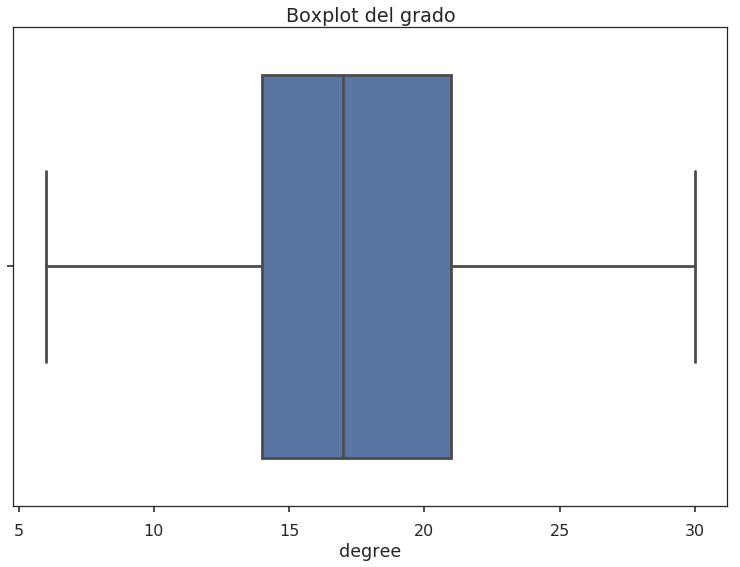

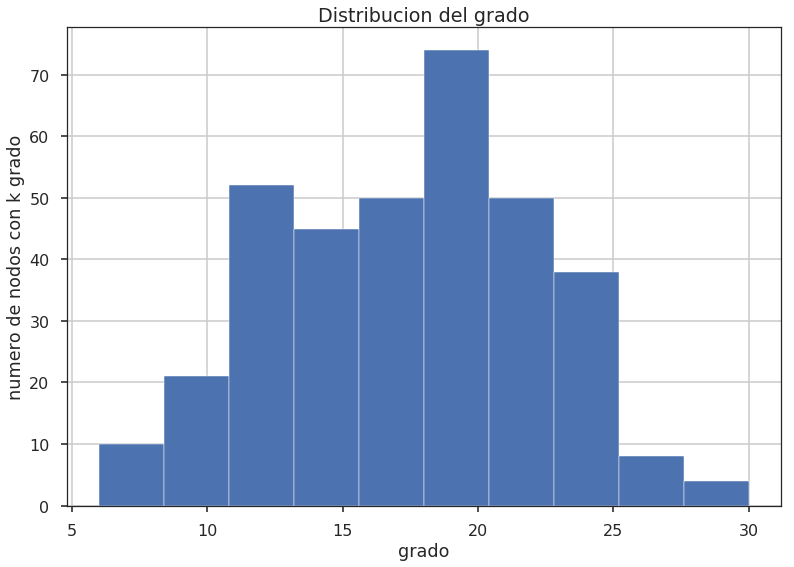

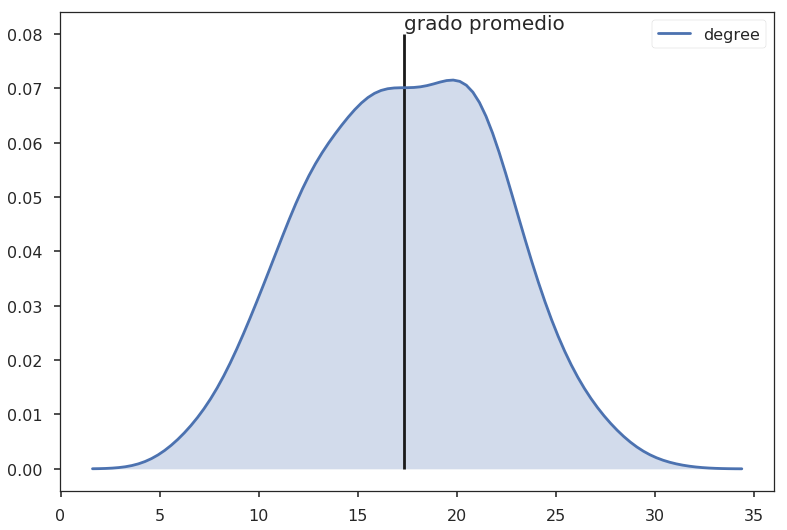

In [267]:
network_result(red_corr_dimer_con)

Info: Name: 
Type: Graph
Number of nodes: 352
Number of edges: 3082
Average degree:  17.5114
densidad: 0.04989
Clustering Promedio: 0.50857
Promedio de camino mas corto 3.47235
Transitividad: 0.46985
Diametro: 7
Radio: 4
Centro de la red [157, 158, 159, 160, 162, 164, 166, 170, 182, 331, 333]
Grado promedio: 17.5114


Authorities  Eigenvector  Harmonic_Closeness  Closeness      Hubs  \
162     0.024308     0.102340            0.428504   0.381522  0.024308   
54     -0.001807     0.079176            0.392187   0.338476 -0.001807   
161     0.023768     0.084304            0.410606   0.361856  0.023768   
184     0.010640     0.070482            0.402462   0.346496  0.010640   
168     0.021478     0.058618            0.410369   0.362229  0.021478   
171     0.028030     0.096366            0.431771   0.381107  0.028030   
335     0.005946     0.040181            0.388731   0.335885  0.005946   
183     0.012231     0.085467            0.415578   0.365245  0.012231   
170     0.031582     0.082739            0.419508   0.369863  0.031582   
169     0.025330     0.067869            0.413352   0.365625  0.025330   
172     0.028242     0.100938            0.428930   0.378641  0.028242   
324     0.000734     0.081199            0.398580   0.341440  0.000734   
155     0.020265     0.101940            0.414441   0.360000  0.020265   
181     0.010169     0.086886            0.408475   0.365625  0.010169   
182     0.010603     0.075980            0.401989   0.360740  0.010603   
97      0.000639     0.075182            0.381155   0.315647  0.000639   
250     0.000122     0.049428            0.355540   0.303633  0.000122   
42      0.000090     0.109819            0.396875   0.333968  0.000090   
167     0.019363     0.053613            0.398627   0.353119  0.019363   
331     0.005452     0.069005            0.401989   0.354545  0.005452   

       Degree  Betweenness  
162  0.071225     0.054425  
54   0.065527     0.050665  
161  0.071225     0.049120  
184  0.065527     0.047130  
168  0.068376     0.042725  
171  0.079772     0.040799  
335  0.062678     0.037891  
183  0.068376     0.037299  
170  0.074074     0.034310  
169  0.065527     0.031176  
172  0.076923     0.029484  
324  0.068376     0.028086  
155  0.076923     0.027876  
181  0.059829     0.027421  
182  0.054131     0.026347  
97   0.068376     0.025416  
250  0.059829     0.024531  
42   0.076923     0.023505  
167  0.054131     0.022041  
331  0.062678     0.021947

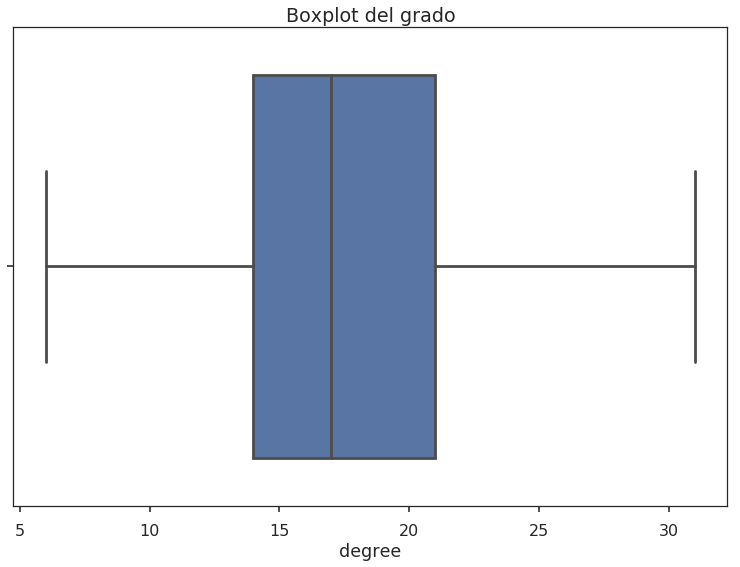

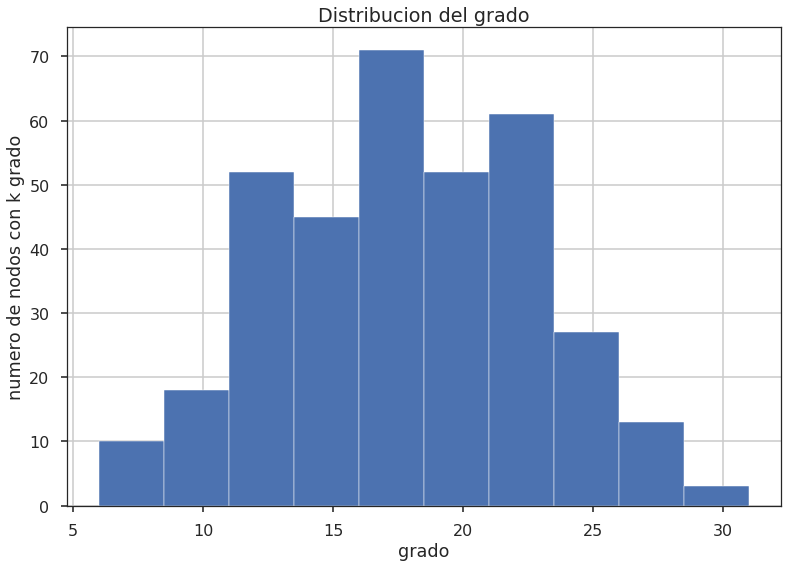

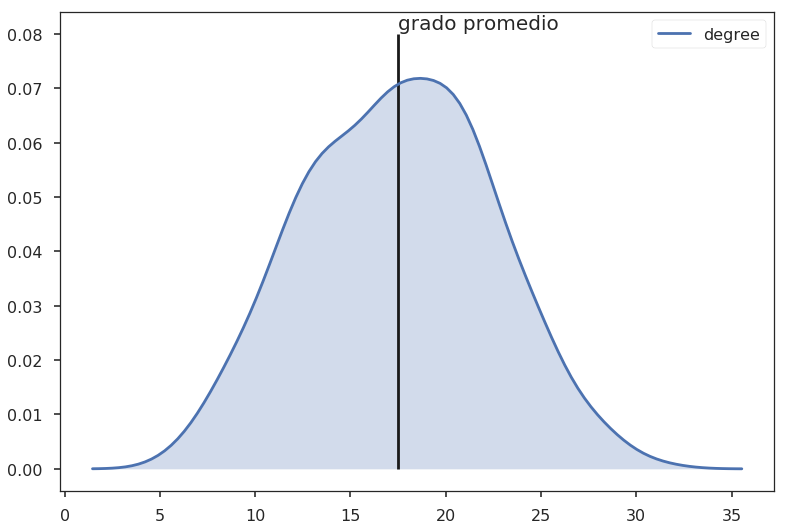

In [268]:
network_result(red_corr_dimer_sin)